# Prieskumná analýza datasetu č.17

Dataset č.17 predstavuje zdravotné záznamy rôznych typov ľudí. V údajoch sa nachádzajú rôzne typy informácií, ako napr. ktoré druhy zdravotných testov ľudia podstúpili, ich namerané hodnoty a základné informácie o pacientoch ako napr. ich pohlavie, vek, národnosť, zamestnanie, rasa...

## Základný opis dát

### Počet záznamov

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
import matplotlib
import statistics

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

data = pd.read_csv("17/train.csv", sep=',', header=None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 35 columns):
0     2800 non-null float64
1     2800 non-null object
2     2801 non-null object
3     2801 non-null object
4     2801 non-null object
5     2801 non-null object
6     2801 non-null object
7     2801 non-null object
8     2801 non-null object
9     2517 non-null object
10    2801 non-null object
11    2216 non-null object
12    2801 non-null object
13    2617 non-null object
14    2504 non-null object
15    2801 non-null object
16    2801 non-null object
17    2801 non-null object
18    2801 non-null object
19    2801 non-null object
20    2801 non-null object
21    2801 non-null object
22    2801 non-null object
23    2801 non-null object
24    2365 non-null object
25    2801 non-null object
26    2801 non-null object
27    2801 non-null object
28    2801 non-null object
29    2801 non-null object
30    2801 non-null object
31    2801 non-null object
32    2801 non-null object
3

Môžeme vidieť, že náš trénovací dataset obsahuje 2801 záznamov a 34 atribútov.

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,NaN,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


V prvom riadku záznamov sa nachádzajú názvy jednotlivých stĺpcov, preto pre ľahšie opísanie, čo sa v dátach nachádza, si prvý riadok záznamu prehodíme na názvy stĺpcov.

In [4]:
data = data.rename(columns=data.iloc[0]).drop(data.index[0])
data.head()

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
5,4.0,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,f,?,other,negative.|3047,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


In [5]:
data.count()

NaN                          2800
age                          2799
sex                          2800
query on thyroxine           2800
on antithyroid medication    2800
thyroid surgery              2800
I131 treatment               2800
tumor                        2800
hypopituitary                2800
TSH                          2516
T3 measured                  2800
T3                           2215
TT4 measured                 2800
TT4                          2616
T4U                          2503
FTI measured                 2800
FTI                          2800
TBG measured                 2800
TBG                          2800
referral source              2800
class                        2800
workclass                    2800
fnlwgt                       2800
education                    2800
education-num                2364
marital-status               2800
occupation                   2800
relationship                 2800
race                         2800
capital-gain  

Čo sa týka počtu jednotlivých záznamov, cez príkaz count() pekne vidíme, koľko údajov v jednotlivých stĺpcoch nám chýba. To však neznamená, že tých chýbajúcich hodnôt nie je viac, lebo môžu byť reprezentované formou nejakého znaku, napr. "?", "-", "null", "nan" ako string. Počet záznamov je teraz 2800, nakoľko jeden záznam sme upravili na názvy stĺpcov.

### Stĺpec age

In [6]:
data["age"].count()

2799

In [7]:
data["age"].unique()

array(['53.0', '73.0', '24.0', '25.0', '60.0', '32.0', '71.0', '27.0',
       '64.0', '65.0', '34.0', '51.0', '62.0', '42.0', '47.0', '30.0',
       '75.0', '35.0', '36.0', '39.0', '7200.0', '72.0', '79.0', '40.0',
       '38.0', '48.0', '50.0', '23.0', '81.0', '43.0', '57.0', '77.0',
       '56.0', '59.0', '67.0', '58.0', '2500.0', '18.0', '22.0', '1800.0',
       '55.0', '63.0', '46.0', '29.0', '74.0', '66.0', '90.0', '2.0',
       '5000.0', '70.0', '13.0', '5500.0', '69.0', '4500.0', '68.0',
       '17.0', '31.0', '-4800.0', '44.0', '78.0', '-7700.0', '52.0',
       '89.0', '49.0', '19.0', '28.0', '21.0', '20.0', '54.0', '87.0',
       '-5800.0', '26.0', '-6600.0', '61.0', '41.0', '-3600.0', '76.0',
       '15.0', '-7300.0', '37.0', '6000.0', '-8700.0', '45.0', '2100.0',
       '12.0', '-3300.0', '83.0', '16.0', '6400.0', '4300.0', '84.0',
       '2000.0', '85.0', '5700.0', '-3900.0', '-5700.0', '-3700.0',
       '86.0', '100.0', '3700.0', '33.0', '-6200.0', '8300.0', '93.0',
      

In [8]:
data["age"].value_counts()

59.0        69
70.0        67
60.0        60
63.0        59
55.0        56
72.0        56
73.0        52
68.0        51
65.0        48
34.0        48
61.0        47
64.0        46
57.0        46
67.0        45
53.0        45
37.0        45
62.0        44
75.0        42
58.0        42
69.0        41
54.0        41
38.0        40
35.0        40
29.0        39
41.0        39
            ..
93.0         1
4.0          1
6900.0       1
5200.0       1
-45500.0     1
1500.0       1
-6300.0      1
6800.0       1
-4200.0      1
-8300.0      1
-6700.0      1
-3800.0      1
2400.0       1
-1300.0      1
8200.0       1
7100.0       1
-2800.0      1
-2400.0      1
-4400.0      1
-8800.0      1
-700.0       1
-3400.0      1
6.0          1
8500.0       1
3600.0       1
Name: age, Length: 218, dtype: int64

In [9]:
output = []
for i in data['age'].values:
    output.append(pd.to_numeric(i))

print('Pocet hodnot v stlpci:', len(output))  
print('Priemer hodnot v stlpci:', np.mean(output))

Pocet hodnot v stlpci: 2800
Priemer hodnot v stlpci: nan


V stĺpci **age** sa nachádzajú numerické hodnoty, ktoré predstavujú vek pacienta. 
Nachádzajú sa tu nasledovné chyby:
1. Záporné hodnoty - Riešenie: prepísať na kladné
2. Hodnoty, ktoré sú vyššie ako číslo 1000 - Riešenie: Vydeliť tieto čísla číslom 100
3. Vek by mal byť reprezentovaný skôr celým číslom, no rozhodli sme sa, že typ float nám neprekáža (je to minoritná chyba)
4. Stĺpec **age** obsahuje 2799 záznamov, takže jeden údaj o veku chýba - Riešenie: Chýbajúci vek vyrátame podľa dátumu narodenia

### Stĺpec sex

In [10]:
data["sex"].unique()

array(['M', 'F', '?'], dtype=object)

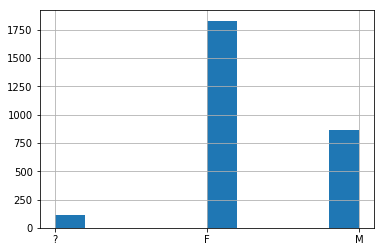

In [11]:
data["sex"].hist()

In [12]:
data["sex"].describe()

count     2800
unique       3
top          F
freq      1830
Name: sex, dtype: object

V stĺpci **sex** sa nachádzajú písmenkové hodnoty, ktoré predstavujú pohlavie pacienta. Sú uvedené anglickými skratkami, pričom M = male, muž, F = female, žena. Z histogramu vidíme, že najviac pacientov predstavujú ženy. Nachádzajú sa tu nasledovné chyby:

1. Máme 110 chýbajúcich hodnôt reprezentovaných znakom "?" - Možné riešenie: Vidíme, že pomer žien k mužom je približne 2:1, tak dopĺňať hodnoty budeme náhodným generovaním s pravdepodobnosťou pre F: 66,66% a pre M: 33,33%

### Stĺpec query on thyroxine

In [13]:
data["query on thyroxine"].unique()

array(['f', 't'], dtype=object)

In [14]:
data["query on thyroxine"].value_counts()

f    2760
t      40
Name: query on thyroxine, dtype: int64

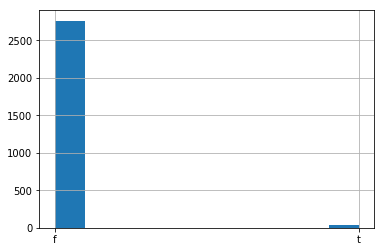

In [15]:
data["query on thyroxine"].hist()

V stĺpci **query on thyroxine** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Z počtu hodnôt vidíme, že nemáme chýbajúce dáta a drvivú väčšinu dát predstavuje hodnota "false". Query on thyroxine predstavuje, či je hladina hormónu tyroxín u pacientov v poriadku alebo naopak. False znamená, že hodnota je v poriadku, True znamená, že hladina hormónu tyroxín je u pacientov nízka.

### Stĺpec on antithyroid medication

In [16]:
data["on antithyroid medication"].unique()

array(['f', 't'], dtype=object)

In [17]:
data["on antithyroid medication"].value_counts()

f    2766
t      34
Name: on antithyroid medication, dtype: int64

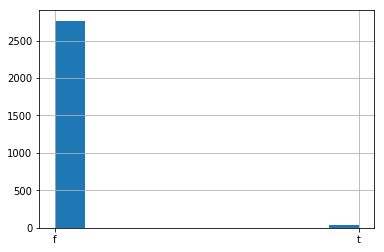

In [18]:
data["on antithyroid medication"].hist()

V stĺpci **on antithyroid medication** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec on anithyroid medication predstavuje, či je pacient na antityroidnom liečení.

### Stĺpec thyroid surgery

In [19]:
data["thyroid surgery"].unique()

array(['f', 't'], dtype=object)

In [20]:
data["thyroid surgery"].value_counts()

f    2761
t      39
Name: thyroid surgery, dtype: int64

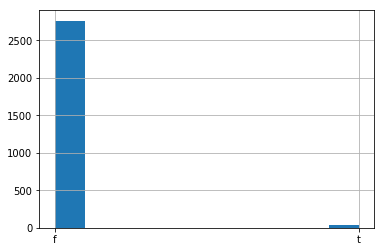

In [21]:
data["thyroid surgery"].hist()

V stĺpci **thyroid surgery** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec thyroid surgery predstavuje, či pacient podstúpil operáciu kvôli hormónu tyroid.

### Stĺpec I131 treatment

In [22]:
data["I131 treatment"].unique()

array(['f', 't'], dtype=object)

In [23]:
data["I131 treatment"].value_counts()

f    2752
t      48
Name: I131 treatment, dtype: int64

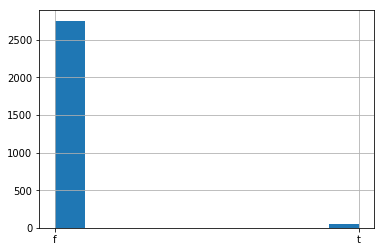

In [24]:
data["I131 treatment"].hist()

V stĺpci I131 treatment sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec I131 treatment predstavuje, či pacient podstúpil liečbu na I131

### Stĺpec tumor

In [25]:
data["tumor"].unique()

array(['f', 't'], dtype=object)

In [26]:
data["tumor"].value_counts()

f    2729
t      71
Name: tumor, dtype: int64

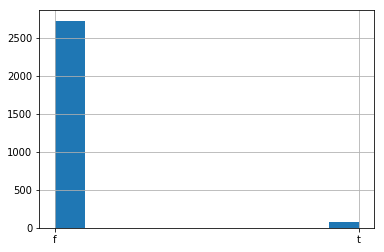

In [27]:
data["tumor"].hist()

V stĺpci **tumor** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec tumor predstavuje, či pacient má alebo nemá nádor.

### Stĺpec hypopituitary

In [28]:
data["hypopituitary"].unique()

array(['f', 't'], dtype=object)

In [29]:
data["hypopituitary"].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

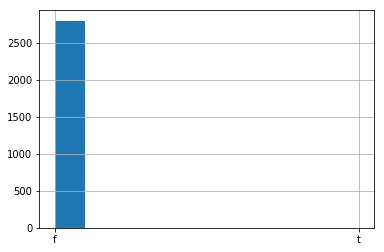

In [30]:
data["hypopituitary"].hist()

V stĺpci **hypopituitary** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec hypopituitary predstavuje, či pacient má zníženú tvorbu hormónov štítnej žlazy.

### Stĺpec T3 measured

In [31]:
data["T3 measured"].unique()

array(['t', 'f'], dtype=object)

In [32]:
data["T3 measured"].value_counts()

t    2215
f     585
Name: T3 measured, dtype: int64

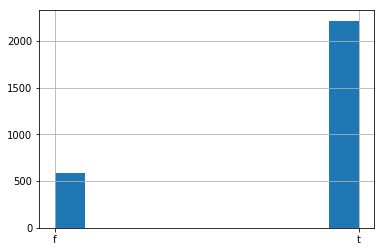

In [33]:
data["T3 measured"].hist()

V stĺpci **T3 measured** sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec T3 measured predstavuje, či pacientovi bola meraná hodnota T3.

### Stĺpec TT4 measured

In [34]:
data["TT4 measured"].unique()

array(['t', 'f'], dtype=object)

In [35]:
data["TT4 measured"].value_counts()

t    2616
f     184
Name: TT4 measured, dtype: int64

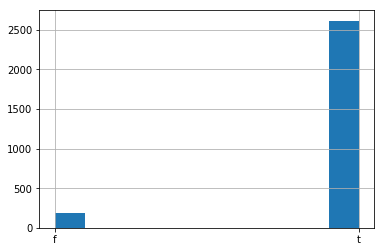

In [36]:
data["TT4 measured"].hist()

V stĺpci **TT4** measured sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec TT4 measured predstavuje, či pacientovi bola meraná hodnota TT4.

### Stĺpec FTI measured

In [37]:
data["FTI measured"].unique()

array(['t', 'f'], dtype=object)

In [38]:
data["FTI measured"].value_counts()

t    2505
f     295
Name: FTI measured, dtype: int64

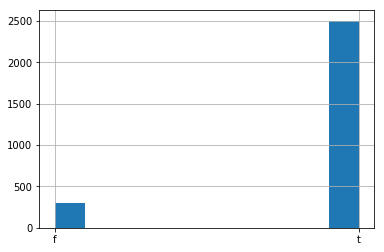

In [39]:
data["FTI measured"].hist()

V stĺpci **FTI** measured sa nachádzajú hodnoty t a f, ktoré znamenajú true a false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádzajú iba písmenká t a f, takže žiadne chyby sme nezistili. Stĺpec FTI measured predstavuje, či pacientovi bola meraná hodnota FTI.

### Stĺpec TBG measured

In [40]:
data["TBG measured"].unique()

array(['f'], dtype=object)

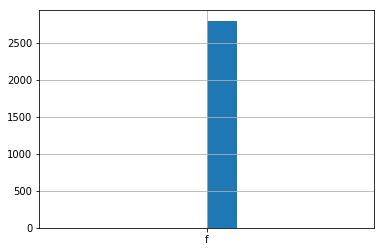

In [41]:
data["TBG measured"].hist()

V stĺpci **TBG** measured sa nachádzajú iba hodnoty f, ktoré znamenajú false. Hodnôt máme dokopy 2800, čiže žiadne nechýbajú a pomocou príkazu unique() sme zistili, že v stĺpci sa nachádza iba písmenko f, takže žiadne chyby sme nezistili. Stĺpec TBG measured predstavuje, či pacientovi bola meraná hodnota TBG.

### Stĺpec referral source

In [42]:
data["referral source"].unique()

array(['SVHC', 'SVI', 'other', 'Other', 'sVHC', 'sVI', 'STMW', 'SVHD',
       'sTMW', 'sVHD'], dtype=object)

In [43]:
data["referral source"].value_counts()

other    1464
SVI       698
SVHC      247
Other     168
STMW       83
sVI        73
sVHC       28
SVHD       28
sTMW        8
sVHD        3
Name: referral source, dtype: int64

V stĺpci **referral source** sa nachádzajú hodnoty "other", "SVI", "SVHC", "SMTW" a "SVHD". Zvyšné sú rovnaké, len napísané s preklepom, čiže ich bude nutné zjednotiť na rovnaký formát, aby sme s dátami tohto stĺpca vedeli ďalej pracovať.

### Stĺpec workclass

In [44]:
data["workclass"].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'], dtype=object)

In [45]:
data["workclass"].value_counts()

 Private             1948
 ?                    217
 Local-gov            209
 Self-emp-not-inc     168
 State-gov            112
 Federal-gov           83
 Self-emp-inc          61
 Without-pay            2
Name: workclass, dtype: int64

In [46]:
data["workclass"].count()

2800

V stĺpci **workclass** sa nachádzajú hodnoty "Private", "Local-gov", "Self-emp-not-inc", "State-gov", "Federal-gov", "Self-emp-inc" a "Without-pay". Okrem toho sa tam nachádza hodnota "?", ktorá predstavuje chýbajúce dáta a je ich 217.
1. 217 chýbajúcich dát - Riešenie: workclass "Private" sa nachádza v dátach 1948 krát, pričom ostatné hodnoty 200 krát a menej. Najrozumnejšie bude podľa nás doplniť chýbajúce dáta mediánom

### Stĺpec education

In [47]:
data["education"].unique()

array([' HS-grad', ' 7th-8th', ' Masters', ' Some-college', ' 11th',
       ' Assoc-voc', ' Bachelors', ' Assoc-acdm', ' Prof-school', ' 10th',
       ' 5th-6th', ' 12th', ' 1st-4th', ' 9th', ' Doctorate',
       ' Preschool'], dtype=object)

In [48]:
data["education"].count()

2800

In [49]:
data["education"].value_counts()

 HS-grad         903
 Some-college    660
 Bachelors       444
 Masters         142
 Assoc-voc       116
 Assoc-acdm      102
 10th             99
 11th             95
 9th              44
 7th-8th          43
 Prof-school      39
 12th             33
 Doctorate        27
 5th-6th          26
 1st-4th          21
 Preschool         6
Name: education, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

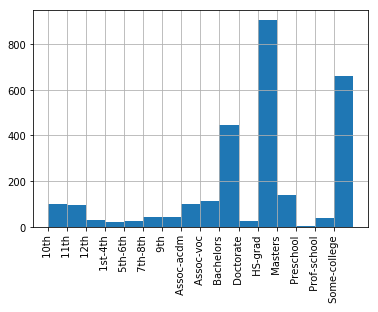

In [50]:
data["education"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.xticks(rotation='vertical')

V stĺpci **education** sa nachádza 16 rôznych textových hodnôt. Žiadne hodnoty nechýbajú, žiadne hodnoty sa textovo neopakujú. Z grafu môžeme vyčítať, že najviac pacientov má hodnotu education HS-grad, Some-college alebo majú titul bakalár.

### Stĺpec marital-status

In [51]:
data["marital-status"].unique()

array([' Married-civ-spouse', ' Never-married', ' Divorced', ' Widowed',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [52]:
data["marital-status"].count()

2800

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

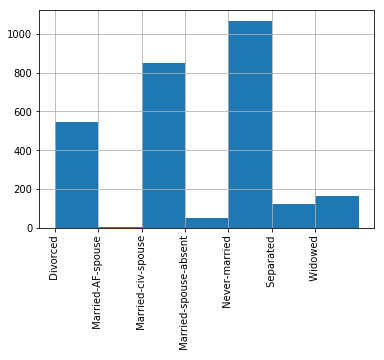

In [53]:
data["marital-status"].hist(bins=[0,1,2,3,4,5,6,7])
plt.xticks(rotation='vertical')

V stĺpci **marital-status** sa nachádza 7 rôznych textových hodnôt. Žiadne hodnoty nechýbajú, žiadne hodnoty sa textovo neopakujú. Z grafu môžeme vyčítať, že najviac pacientov má hodnotu marital-status "Never-married" alebo "Married-civ-spouse"

### Stĺpec occupation

In [54]:
data["occupation"].unique()

array([' Handlers-cleaners', ' Machine-op-inspct', ' Exec-managerial',
       ' Adm-clerical', ' Other-service', ' Sales', ' Craft-repair', ' ?',
       ' Tech-support', ' Prof-specialty', ' Transport-moving',
       ' Protective-serv', ' Priv-house-serv', ' Farming-fishing'],
      dtype=object)

In [55]:
data["occupation"].count()

2800

In [56]:
data["occupation"].value_counts()

 Adm-clerical         502
 Other-service        411
 Prof-specialty       398
 Exec-managerial      311
 Sales                260
 ?                    217
 Craft-repair         211
 Machine-op-inspct    151
 Tech-support          83
 Handlers-cleaners     83
 Transport-moving      68
 Farming-fishing       52
 Protective-serv       30
 Priv-house-serv       23
Name: occupation, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

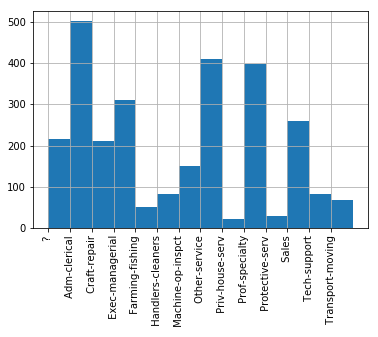

In [57]:
data["occupation"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.xticks(rotation='vertical')

V stĺpci **occupation** sa nachádza 14 rôznych textových hodnôt. Žiadne hodnoty nechýbajú, žiadne hodnoty sa textovo neopakujú. Z grafu môžeme vyčítať, že najviac pacientov má hodnotu occupation "Adm-clerical", "Other-service" alebo "Prof-speciality". Zistili sme však ešte chyby:
1. Chýbajúce dáta označené "?", je ich 217 - Riešenie:

### Stĺpec relationship

In [58]:
data["relationship"].unique()

array([' Husband', ' Not-in-family', ' Not_in_family', ' Wife',
       ' Own-child', ' Unmarried', ' Other-relative', ' Other_relative',
       ' Own_child'], dtype=object)

In [59]:
data["relationship"].value_counts()

 Not-in-family     816
 Husband           569
 Unmarried         502
 Own-child         421
 Wife              266
 Not_in_family     104
 Other-relative     75
 Own_child          34
 Other_relative     13
Name: relationship, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

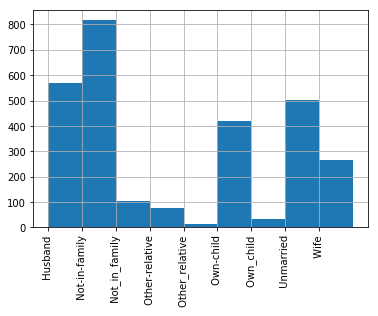

In [60]:
data["relationship"].hist(bins=[0,1,2,3,4,5,6,7,8,9])
plt.xticks(rotation='vertical')

V stĺpci **relationship** sa nachádzajú hodnoty "Husband", "Not in family", "Other relative", "Own child", "Unmarried" alebo "Wife". Zistili sme nasledovné chyby:
1. Duplicitné hodnoty - napísané s preklepom - Riešenie: Prepísať chybné hodnoty na rovnaký formát (napr: Own-child a Own_child zjednotiť na own-child)

### Stĺpec race

In [61]:
data["race"].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [62]:
data["race"].count()

2800

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

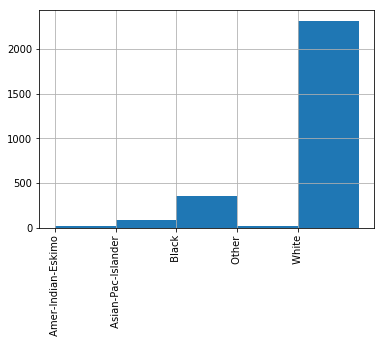

In [63]:
data["race"].hist(bins=[0,1,2,3,4,5])
plt.xticks(rotation='vertical')

V stĺpci **race** sa nachádza rasa pacienta a nadobúda hodnoty "White", "Black", "Asian-Pac-Islander", "Asian-Indian_Eskimo" alebo "Other". Dáta v tomto stĺpci máme všetky a nenašli sme v ňom chýbajúce dáta alebo chybé dáta.

### Stĺpec native-country

In [64]:
data["native-country"].unique()

array([' ?', ' Laos', ' United-States', ' Guatemala', ' Puerto-Rico',
       ' Mexico', ' Ireland', ' Cuba', ' Honduras', ' Italy',
       ' Dominican-Republic', ' Peru', ' Canada', ' Portugal',
       ' Philippines', ' South', ' Jamaica', ' India', ' France',
       ' Germany', ' England', ' Outlying-US(Guam-USVI-etc)', ' Poland',
       ' Ecuador', ' Columbia', ' China', ' El-Salvador', ' Cambodia',
       ' Japan', ' Thailand', ' Haiti', ' Iran', ' Hungary', ' Vietnam',
       ' Yugoslavia', ' Taiwan', ' Nicaragua', ' Hong', ' Scotland',
       ' Greece'], dtype=object)

In [65]:
data["native-country"].count()

2800

In [66]:
data["native-country"].value_counts()

 United-States                 2502
 Mexico                          47
 ?                               42
 Philippines                     20
 Canada                          12
 Jamaica                         12
 Italy                           12
 Germany                         11
 El-Salvador                     11
 Puerto-Rico                     10
 Guatemala                        8
 England                          8
 Cuba                             7
 Poland                           7
 Japan                            7
 Dominican-Republic               6
 Haiti                            6
 South                            6
 Taiwan                           5
 Laos                             5
 China                            5
 Peru                             5
 Vietnam                          5
 Columbia                         5
 Ireland                          4
 India                            4
 France                           4
 Yugoslavia                 

In [67]:
data["native-country"].describe()

count               2800
unique                40
top        United-States
freq                2502
Name: native-country, dtype: object

V stĺpci **native-country** sa nachádzajú textové hodnoty. Unikátnych hodnôt je 40, pričom najfrekventovanejšia hodnota je United-States, ktorá sa v dátach vyskytuje 2502 krát. V stĺpci sa nachádza aj hodnota "?" 42 krát, čo znamená, že máme 42 chýbajúcich dát.
1. Chýbajúce dáta (42) - Riešenie: Chýbajúce dáta doplniť mediánom (United-States)

### Stĺpec date_of_birth

In [68]:
data["date_of_birth"].describe()

count           2799
unique          2719
top       1954-07-23
freq               3
Name: date_of_birth, dtype: object

In [69]:
data["date_of_birth"].head(20)

1              1965-01-22
2              1944-04-01
3                45-03-12
4              1993-12-26
5              1992-08-27
6              1958-02-13
7              1985-07-26
8              1946-06-21
9     1990-06-02 00:00:00
10             1953-06-30
11             1952-04-08
12             1984-02-08
13             1966-08-06
14             1994-03-08
15             1956-03-19
16             1964-03-27
17             1983-03-24
18    1975-03-22 00:00:00
19             1970-10-31
20             1987-06-26
Name: date_of_birth, dtype: object

V stĺpci **date_of_birth** sa nachádzajú dátumy narodenia pacientov. Unikátnych ich je 2719, dokopy 2799, čiže jeden údaj nám chýba. Keď sme nahliadli do dát ručne, videli sme, že dátumy majú rôzny formát. Máme teda nasledovné chyby:
1. Rôzne formáty dátumov - Riešenie: Zjednotiť na jeden formát, napr. na dd.mm.yyyy
2. Chýbajúce dáta v počte 1 - Riešenie: Nakoľko najfrekventovanejší dátum sa nachádza iba tri krát, najrozumnejšie bude teda vypočítať nejaký priemerný dátum narodenia (priemerný deň, mesiac a rok)

### Pomocné funkcie

In [70]:
def check_if_number(inputString):
    return any(char.isdigit() for char in str(inputString))

In [71]:
def column_values_parser(column): ##Parser, ktory pouzivame pri stlpcoch s numerickymi hodnotami
    temp_array = []

    temp_column = column.value_counts()
    values = temp_column.values
    indexes = temp_column.index.values

    for value in indexes:
            if (check_if_number(value) == False):
                temp_array.insert(0, None)
            else:
                if (temp_array.count(value) == 0):
                    temp_array.insert(0, pd.to_numeric(value))

    temp_array.reverse()

    output_dict = {}  
    for i in range(len(temp_array)):
        output_dict[temp_array[i]] = values[i]
        
    return output_dict

### Stĺpec TSH

In [72]:
data["TSH"].count()

2516

In [73]:
data["TSH"].unique()

array(['0.3', '2.1', '1.6', '1.3', '468.0', '1.1', nan, '2.4', '0.02',
       '3.5', '2.5', '2.3', '1.9', '1.8', '0.85', '0.2', '7.2', '0.72',
       '2.6', '7.3', '0.05', '2.8', '1.4', '0.03', '76.0', '0.9', '0.5',
       '1.2', '2.0', '4.1', '11.0', '1.5', '0.4', '60.0', '0.8', '5.2',
       '4.8', '0.1', '2.7', '4.4', '0.015', '4.7', '0.025', '28.0',
       '0.065', '5.1', '0.68', '0.15', '0.6', '5.8', '3.0', '6.3',
       '0.045', '0.75', '0.88', '1.7', '0.84', '0.74', '41.0', '3.9',
       '0.97', '0.41', '8.6', '4.9', '0.92', '46.0', '9.4', '0.91', '2.2',
       '16.0', '38.0', '6.5', '0.86', '0.01', '0.005', '0.31', '0.32',
       '0.25', '1.0', '0.58', '478.0', '0.19', '0.035', '0.71', '0.7',
       '0.87', '0.35', '4.2', '5.0', '5.4', '3.7', '4.5', '13.0', '8.3',
       '2.9', '472.0', '55.0', '14.0', '3.8', '0.08', '0.29', '0.52',
       '0.46', '0.04', '0.93', '61.0', '4.0', '35.0', '7.1', '183.0',
       '0.76', '160.0', '0.95', '5.5', '0.09', '6.4', '9.9', '7.5',
       '3

V stĺpci **TSH** máme 2516 numerických hodnôt. Zistili sme, že chýbajúce dáta sú iba typu "null/nan" a iným znakom nie sú predstavené. 

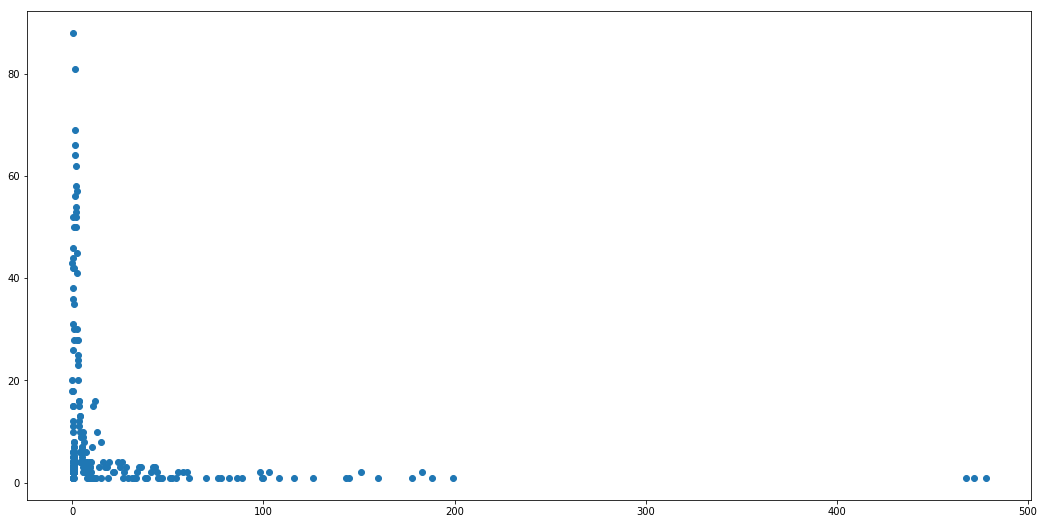

In [74]:
tsh_values = column_values_parser(data.TSH)

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(tsh_values.keys(), tsh_values.values(), 'o')
fig.set_size_inches(18, 9)
plt.show()


Tento graf predstavuje koľko a akých hodnôt sa v stĺpci **TSH** vyskytuje. X-os predstavuje hodnotu a Y-os jej počet výskytov.
Z grafu vidíme, že v stĺpci **TSH** sú niektoré hodnoty vysoko odchýlené, a to buď hodnotou alebo nízkym resp. vysokým výskytom. Nepredpokladáme však zatiaľ, že tieto vychýlené hodnoty sú chybné, nakoľko môžu indikovať, že pacient je chorý.
1. V grafe vidíme, že v pravej časti sú nejaké divné hodnoty, predpokladáme, že ide iba o ich chybný zápis v desatinnej čiarke, takže ich opravu vyriešime tak, že ich vydelíme číslom 100
2. V poslednom stĺpci "medical_info" sa v rámci JSON-u nachádza informácia o počte meraní TSH, takže po premene posledného stĺpca na viac stĺpcov budeme vedieť, či máme TSH hodnoty všetky.

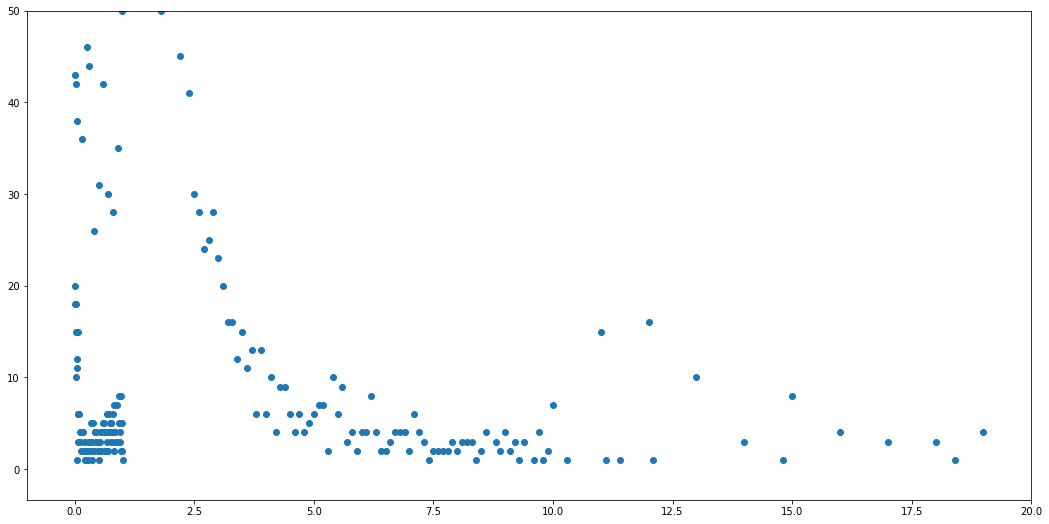

In [75]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(tsh_values.keys(), tsh_values.values(), 'o')
fig.set_size_inches(18, 9)
plt.xlim(xmax=20, xmin=-1)
plt.ylim(ymax=50)
plt.show()

Tento graf predstavuje priblížené hodnoty predchádzajúceho grafu, aby sme ich lepšie videli.

### Stĺpec T3

In [76]:
data["T3"].count()

2215

In [77]:
data["T3 measured"].value_counts()

t    2215
f     585
Name: T3 measured, dtype: int64

V stĺpci **T3** sa nachádza síce iba 2215 hodnôt, pričom celkový počet meraní by mal byť 2800, ale stĺpec **T3 measured** hovorí o tom, koľko meraní **T3** máme mať. Vidíme, že nameraných hodnôt T3 má byť 2215 (T3 measured obsahuje 2215 hodnôt nastavených na true), takže dáta máme všetky. 

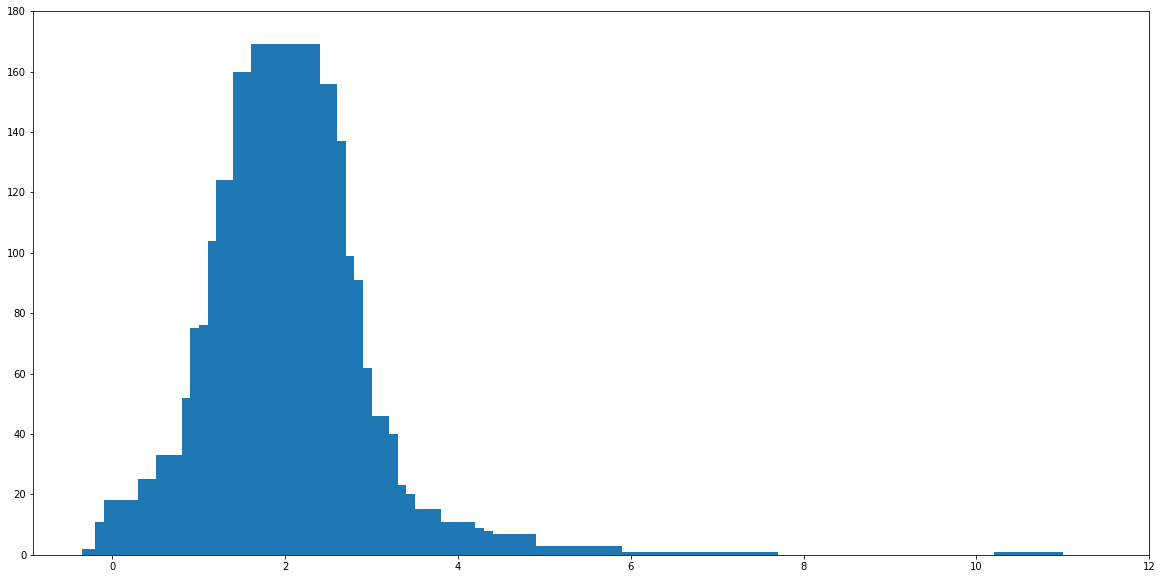

In [78]:
t3_values = column_values_parser(data.T3)

plt.figure(figsize=(20,10))
plt.bar(t3_values.keys(), t3_values.values())
plt.ylim(ymax=180)
plt.xlim(xmax=12)
plt.show()

Graf predstavuje počet výskytov hodnôt stĺpca **T3**, pričom na X-osi sa nachádzajú veľkosti hodnôt a na Y-osi ich počet výskytov. V stĺpci **T3** vidíme taktiež nejaké vychýlené hodnoty v pravej časti, ktoré by sme mohli buď vyhodiť, alebo nejakou rozumnou transformáciou zmeniť na hodnoty, ktoré sú najčastejšie používané, čo sú v tomto prípade hodnoty okolo čísla 2, nakoľko graf má normálové rozdelenie.

### Stĺpec TT4

In [79]:
data["TT4"].count()

2616

In [80]:
data["TT4 measured"].value_counts()

t    2616
f     184
Name: TT4 measured, dtype: int64

V stĺpci TT4 sa nachádza síce iba 2616 hodnôt, pričom celkový počet meraní by mal byť 2800, ale stĺpec TT4 measured hovorí o tom, koľko meraní TT4 máme mať. Vidíme, že nameraných hodnôt TT4 má byť 2616 (TT4 measured obsahuje 2616 hodnôt nastavených na true), takže dáta máme všetky.

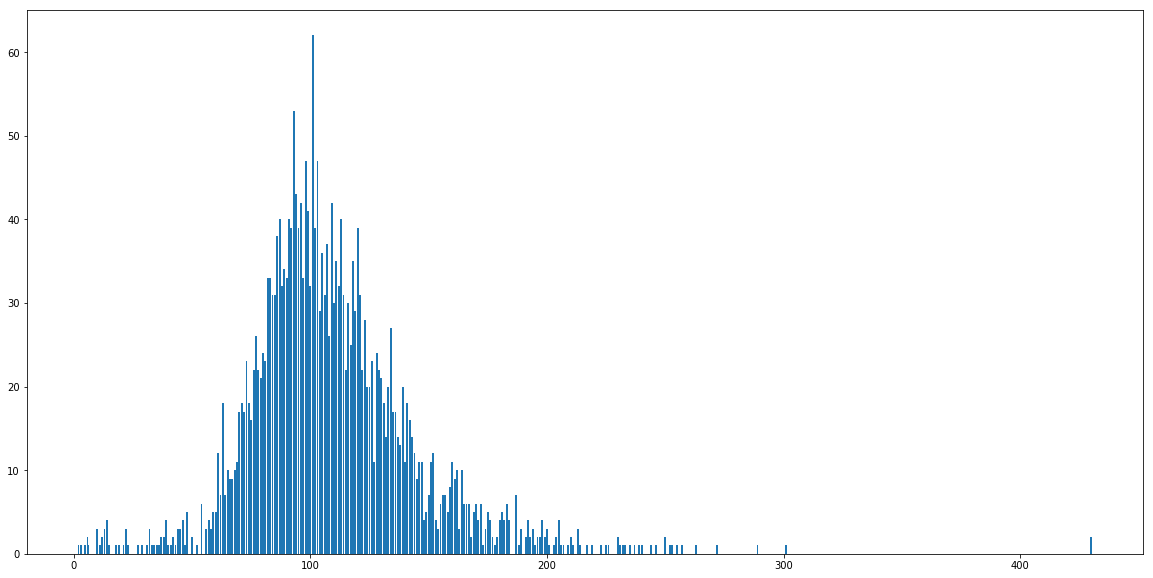

In [81]:
tt4_values = column_values_parser(data.TT4)

plt.figure(figsize=(20,10))
plt.bar(tt4_values.keys(), tt4_values.values())
plt.ylim(ymax=65)
plt.show()

V stĺpci **TT4** je znovu pozorovateľná nekonzistencia dátových hodnôt, pričom načastejšie sú v intervale od 50 do 150. Z grafu môžeme pozorovať, že hodnoty mimo tento interval by nemali mať až tak veľký vplyv na celkový výsledok, preto by bolo vhodné sa ich zbaviť, prípadne ich zmeniť na medián hodnôt.

### Stĺpec T4U

In [82]:
data["T4U"].count()

2503

In [83]:
data["T4U"].unique()

array(['0.91', '0.9', '1.17', '1.0', '1.1', '1.07', '1.29', '1.09',
       '0.97', '0.86', '1.06', '0.93', '0.95', '1.69', '1.18', '0.82',
       '1.05', '0.94', '1.16', '0.74', '1.13', '1.04', '0.72', '1.19',
       '1.12', '1.38', '0.85', '1.02', '1.35', '0.8', '0.99', '0.98', nan,
       '1.3', '1.11', '1.49', '0.89', '0.78', '0.7', '0.79', '0.92',
       '0.83', '0.88', '0.81', '1.03', '1.2', '0.54', '0.75', '1.65',
       '0.5', '0.84', '0.68', '1.01', '1.08', '0.77', '1.23', '1.21',
       '1.14', '0.96', '0.52', '1.24', '0.87', '0.57', '1.28', '1.94',
       '1.31', '1.84', '1.34', '1.75', '0.73', '1.15', '0.67', '1.67',
       '1.26', '0.76', '1.8', '1.25', '1.63', '1.39', '0.61', '1.66',
       '0.66', '1.53', '0.69', '1.27', '0.58', '1.48', '1.93', '0.64',
       '0.59', '1.22', '1.41', '1.5', '1.56', '1.37', '1.42', '1.79',
       '1.71', '0.48', '1.47', '1.33', '1.88', '1.32', '1.4', '1.55',
       '1.36', '1.58', '0.9440000000000001', '1.59', '1.57', '0.71',
       '1.82',

V stĺpci **T4U** sa nachádza 2503 numerických hodnôt. Vidíme, že chýbajúce hodnoty sú predstavené typom "nan" a je ich 297. V poslednom stĺpci "medical_info" sa však nachádza informácia o počte meraní T4U, takže je možné, že nakoniec budeme mať všetky hodnoty T4U a žiadne nebudú chýbajúce.

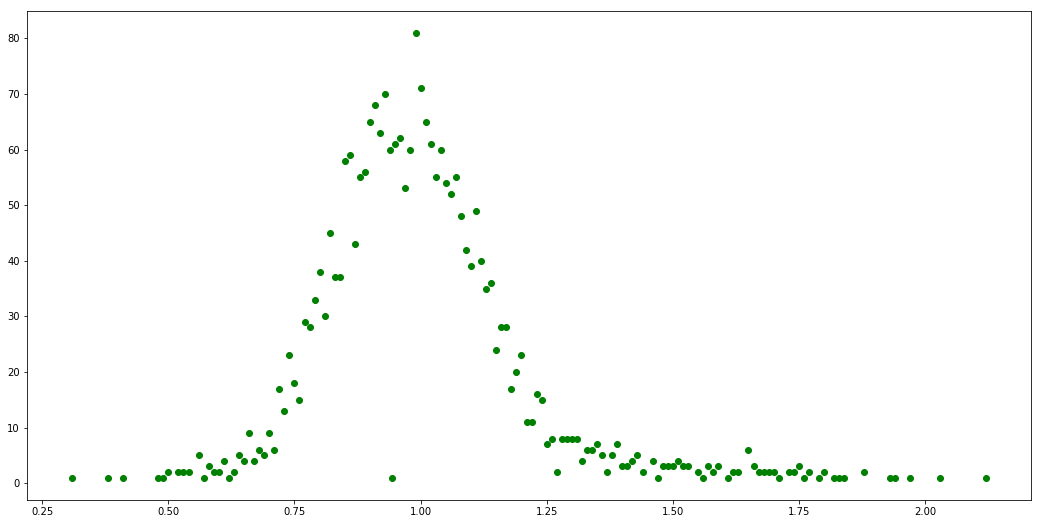

In [84]:
t4u_values = column_values_parser(data.T4U)

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(t4u_values.keys(), t4u_values.values(), 'o', color='g')
fig.set_size_inches(18, 9)
plt.show()

Graf predstavuje počet výskytov hodnôt stĺpca **T4U**, pričom na X-osi sa nachádzajú veľkosti hodnôt a na Y-osi ich počet výskytov. Graf nám tvorí pozorovateľnú krivku, pod krivkou sa nachádza nejaká osamelá hodnota, takže tipujeme že je chybná.

### Stĺpec FTI

In [85]:
data.FTI.value_counts()

?      295
100     52
107     52
93      51
98      51
112     50
97      50
104     48
96      48
114     47
92      45
101     45
108     44
105     44
109     43
102     42
113     41
115     41
95      40
106     39
99      38
110     37
88      37
94      37
90      36
      ... 
362      1
205      1
215      1
28       1
218      1
220      1
43       1
24       1
312      1
9        1
349      1
247      1
213      1
32       1
232      1
274      1
3        1
183      1
221      1
49       1
219      1
2        1
17       1
281      1
224      1
Name: FTI, Length: 210, dtype: int64

V stĺpci **FTI** sa najviac vyskytuje znovu nulová hodnota v podobe "?" 295 krát. Vhodným parsovaním dát vo funkcii column_values_parser() sme tieto hodnoty nahradili hodnotou None, čím sme vylúčili efekt tejto hodnoty vo výslednom grafe, nakoľko graf zobrazuje numerické hodnoty.

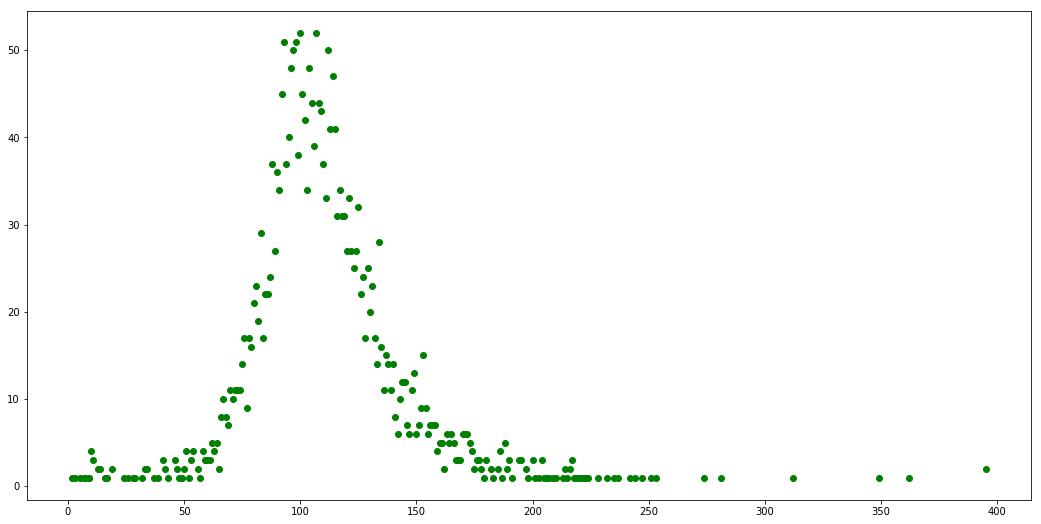

In [86]:
fti_values = column_values_parser(data.FTI)

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(fti_values.keys(), fti_values.values(), 'o', color='g')
fig.set_size_inches(18, 9)
plt.show()

Z grafu môžme pozorovať, že v tomto stĺpci sa najviac vyskytujú hodnoty okolo čísla 100, preto by bolo vhodné rozptýlené hodnoty transformovať na medián poprípade priemer hodnôt v tomto stĺpci. 

### Stĺpec TBG

In [87]:
data.TBG.value_counts()

?    2800
Name: TBG, dtype: int64

Stĺpec **TBG** obsahuje iba nulové hodnoty v podobe "?". Tento stĺpec tak nemá žiadnu váhu pre celkový výsledok preto ho v ďalšej fáze zanedbáme.

### Stĺpec fnlwgt

In [88]:
data.fnlwgt.count()

2800

In [89]:
data.fnlwgt.unique()

array(['90021', '97411', '89491', ..., '109428', '346635', '67234'],
      dtype=object)

In [90]:
data.fnlwgt.value_counts()

133963    4
166961    3
117789    3
120277    3
104509    3
154641    3
64292     3
169324    3
174789    3
111499    3
113364    3
143582    3
138153    2
134367    2
66173     2
210781    2
198183    2
163921    2
157043    2
226789    2
227594    2
163215    2
125933    2
33616     2
177787    2
         ..
187308    1
183810    1
29431     1
118025    1
269284    1
158962    1
156410    1
184543    1
337606    1
116626    1
327825    1
119558    1
60227     1
145189    1
53197     1
77759     1
175034    1
96480     1
91343     1
167652    1
128348    1
137223    1
129447    1
34446     1
220977    1
Name: fnlwgt, Length: 2661, dtype: int64

Stĺpec **fnlwgt** obsahuje rôzne numerické hodnoty a veľmi veľa ich je unikátnych. count() funkcia indikuje, že hodnoty z tohto stĺpca máme všetky. Stĺpec **fnlwgt** hovorí o tom, že o koľko sa namerané hodnoty pacienta rôznych testov odlišujú od populácie. Predpokladáme, že to bude dobrý predikátor v nadchádzajúcej úlohe.

### Stĺpec education-num

In [91]:
data['education-num'].count()

2364

In [92]:
data['education-num'].value_counts()

9        719
10       544
13       359
14       114
11        95
??        88
6         84
12        82
7         67
5         33
15        33
4         33
8         24
16        24
3         23
2         20
??\n       4
1          4
\n??       2
??         2
??\t       2
\nnan      2
\tnan      2
nan\n      1
nan        1
\t??       1
nan\t      1
Name: education-num, dtype: int64

V stĺpci **education-num** sa nachádzajú aj numerické aj iné divné hodnoty. Okrem toho tu máme 636 chýbajúcich hodnôt, čo je vzhľadom na počet dát (2800) celkom veľa. Pri výpise hodnôt stĺpca **education-num** vidíme že je tam veľa zlých hodnôt, ktoré nemajú žiadnu váhu, čo nám na počte chýbajúcich hodnôt ešte pridáva. Vo funkcii column_values_parser() si tieto chybné hodnoty odfiltrujeme, aby sme si hodnoty, ktoré máme k dispozícii, vedeli zobraziť.

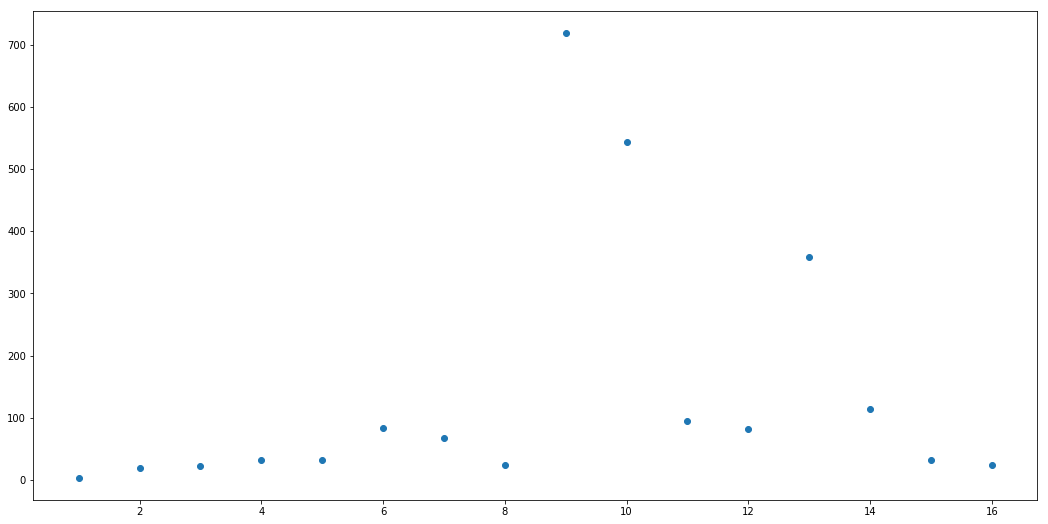

In [93]:
education_num_values = column_values_parser(data['education-num'])

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(education_num_values.keys(), education_num_values.values(), 'o')
fig.set_size_inches(18, 9)
plt.show()

Všimli sme si, že stĺpec **education-num** predstavuje nejaké ID číslo hodnoty stĺpca **education**. Nakoľko v stĺpci **education** máme všetky dáta a žiadne nechýbajú, veľký počet chýbajúcich dát v stĺpci **education-num** vieme na základe neho doplniť. Potrebujeme len zistiť, aká hodnota **education** predstavuje aké ID v stĺpci **education-num**.

### Stĺpec capital-gain

In [94]:
def rounding_values(values, interval_value):
    result = dict()
    for val in values:
        val = pd.to_numeric(val)
        i = (val//interval_value) * interval_value
        if list(result.keys()).count(i) == 0:
            result[i] = 1
        else :
            result[i] = result[i] + 1
            
    return result

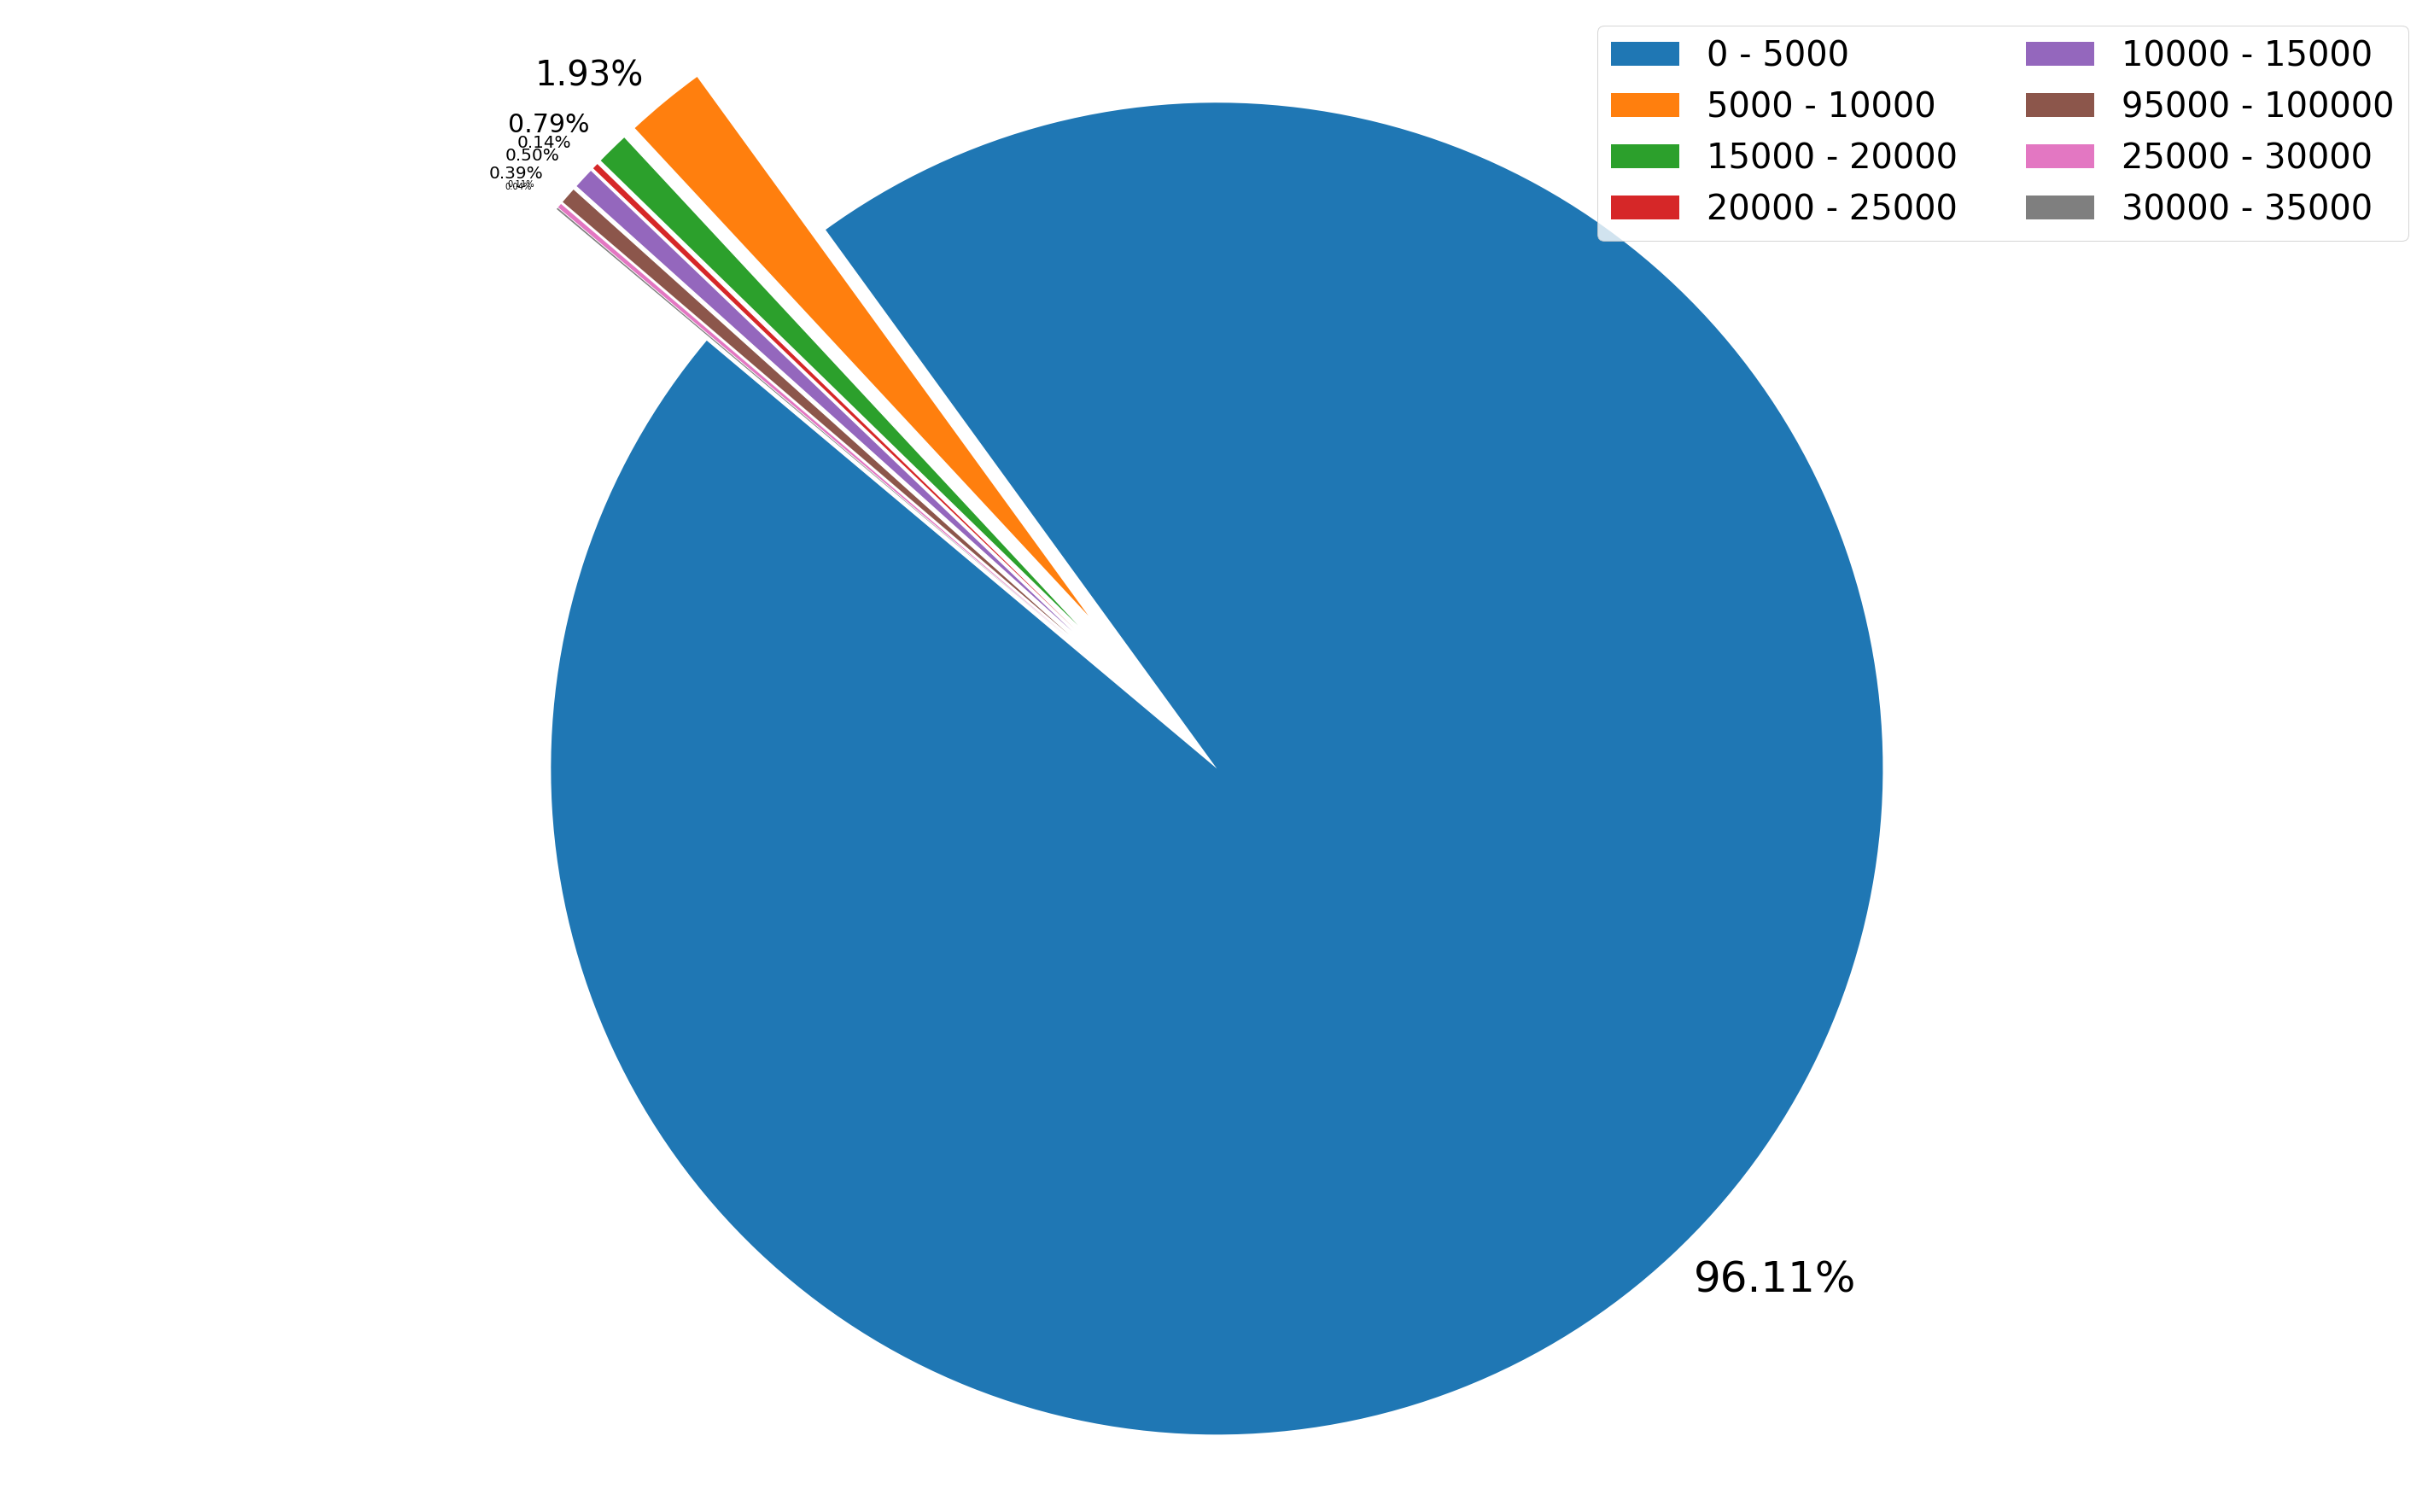

In [95]:
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.size'] = 20

capital_gain_values = list(data['capital-gain'].values)
capital_gain_values = rounding_values(capital_gain_values, 5000)
palette = sns.color_palette(None, len(capital_gain_values))

labels_array = []
for i in capital_gain_values.keys():
    label = '{0} - {1}'.format(i, i + 5000)
    labels_array.append(label)

    
percentage_labels = []
for x in capital_gain_values.values():
    s = "%.2f" % ((x/len(data['capital-gain'].values))*100)
    percentage_labels.append(s + '%')

labels = labels_array
sizes = capital_gain_values.values()
colors = palette
plt.figure(figsize=(40,25))
patches, texts = plt.pie(sizes, explode=[0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], radius=2, 
                         labeldistance=1.05, labels=percentage_labels, colors=colors, startangle=140)
plt.legend(patches, labels, loc=0, fontsize=40, ncol=2)
texts[0].set_fontsize('50')
texts[1].set_fontsize('40')
texts[2].set_fontsize('30')
texts[6].set_fontsize('10')
texts[7].set_fontsize('10')
plt.axis('equal')
plt.tight_layout()

plt.show()

In [96]:
output = []
for i in data['capital-gain'].values:
    output.append(pd.to_numeric(i))

print('Pocet hodnot v stlpci:', len(output))  
print('Priemer hodnot v stlpci:', np.mean(output))
print('Median hodnot stlpca:', np.median(output))

Pocet hodnot v stlpci: 2800
Priemer hodnot v stlpci: 876.6410714285714
Median hodnot stlpca: 0.0


Stĺpec **capital-gain** obsahuje numerické hodnoty, ktoré zrejme informujú o mesačnom zárobku. V grafe vyššie vidíme, že v stĺpci **capital-gain** sa najčastejšie vyskytuje zárobok v intervale od 0 do 5000¤ (96,11%). Vyšší zárobok dosiahnú necelé 4% skúmaných ľudí, čo symbolizuje, že testov sa zúčastnili prevažne ľudia zo strednej vrstvy.

### Stĺpec capital-loss

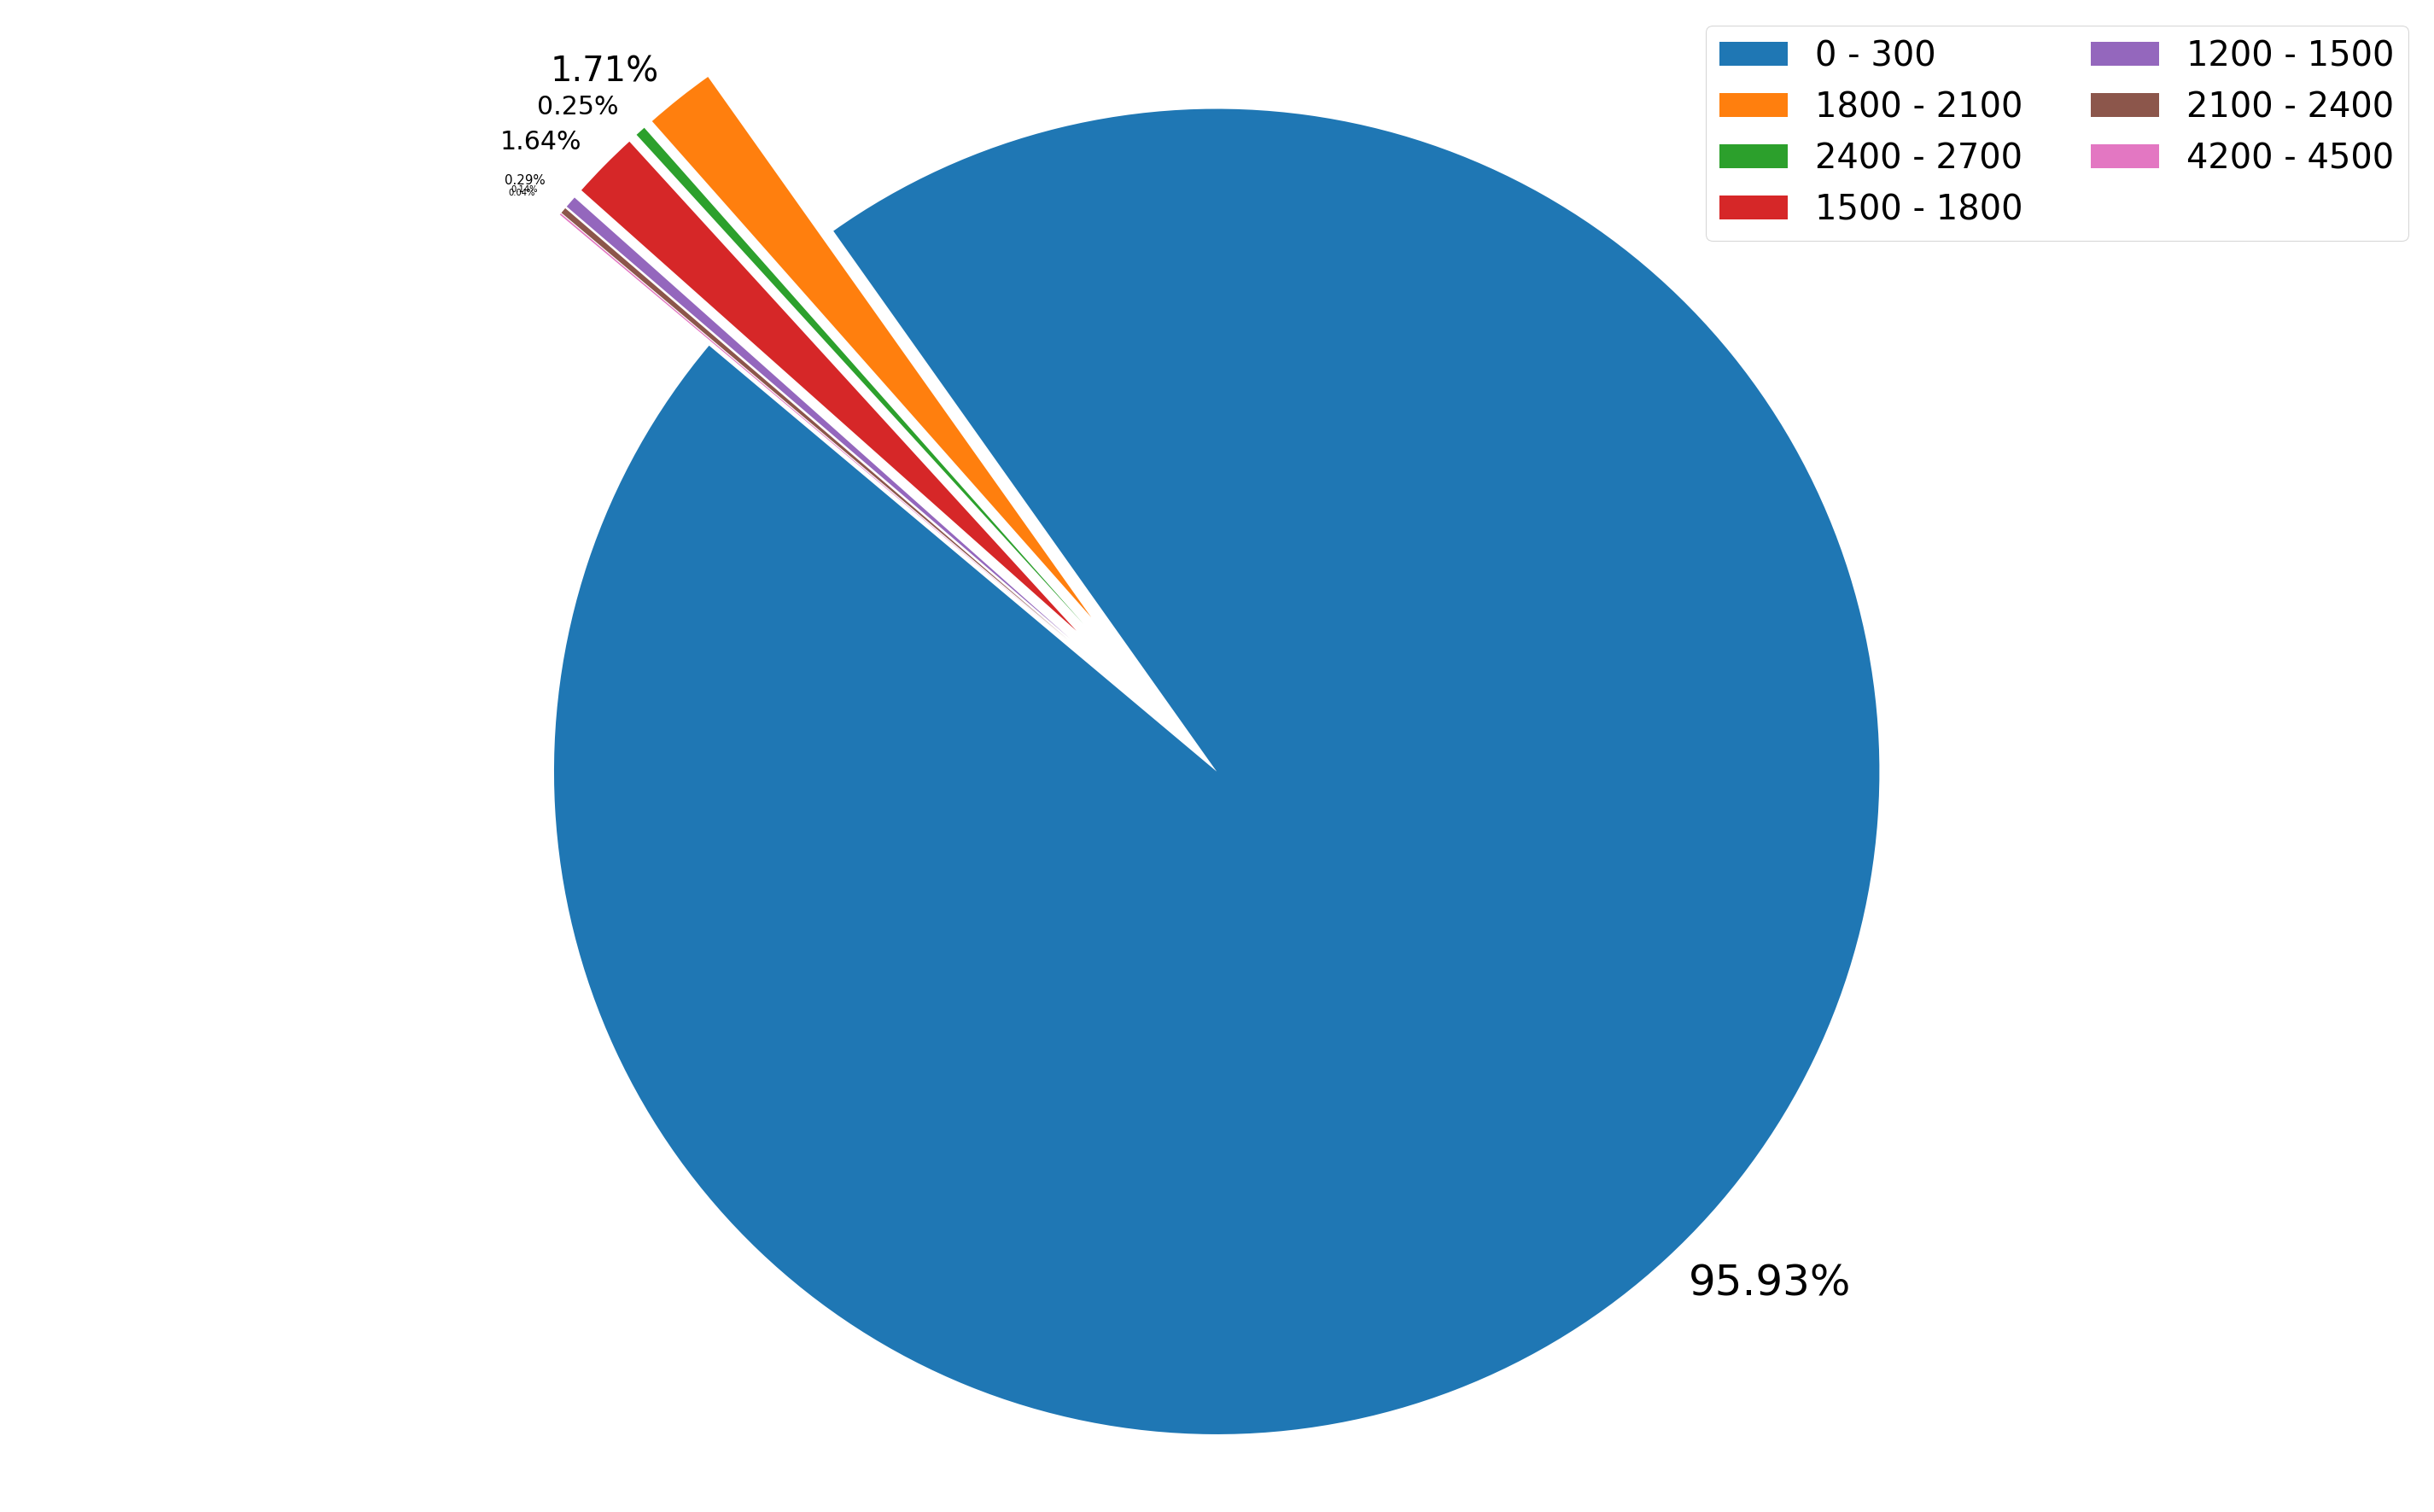

In [97]:
capital_loss_values = list(data['capital-loss'].values)
capital_loss_values = rounding_values(capital_loss_values, 300)

labels_array = []
for i in capital_loss_values.keys():
    label = '{0} - {1}'.format(i, i + 300)
    labels_array.append(label)
    
percentage_labels = []
for x in capital_loss_values.values():
    s = "%.2f" % ((x/len(data['capital-loss'].values))*100)
    percentage_labels.append(s + '%')

labels = labels_array
sizes = capital_loss_values.values()
colors = palette
plt.figure(figsize=(40,25))
patches, texts = plt.pie(sizes, explode=[0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], radius=2, 
                         labeldistance=1.05, labels=percentage_labels, colors=colors, startangle=140)
plt.legend(patches, labels, loc=0, fontsize=40, ncol=2)
texts[0].set_fontsize('50')
texts[1].set_fontsize('40')
texts[2].set_fontsize('30')
texts[3].set_fontsize('30')
texts[4].set_fontsize('15')
texts[5].set_fontsize('10')
texts[6].set_fontsize('10')
plt.axis('equal')
plt.tight_layout()

plt.show()

In [98]:
output = []
for i in data['capital-loss'].values:
    output.append(pd.to_numeric(i))

print('Pocet hodnot v stlpci:', len(output))  
print('Priemer hodnot v stlpci:', np.mean(output))
print('Median hodnot stlpca:', np.median(output))

Pocet hodnot v stlpci: 2800
Priemer hodnot v stlpci: 75.11821428571429
Median hodnot stlpca: 0.0


Stĺpec **capital-loss** obsahuje numerické hodnoty, ktoré zrejme informujú o mesačnom zárobku. V grafe vyššie vidíme, že v stĺpci capital-gain sa najčastejšie vyskytuje zárobok v intervale od 0 do 300¤ (95,93%), a to hlavne y dôvodu, že najčasťejšou hodnotou je 0.

### Stĺpec hours-per-week

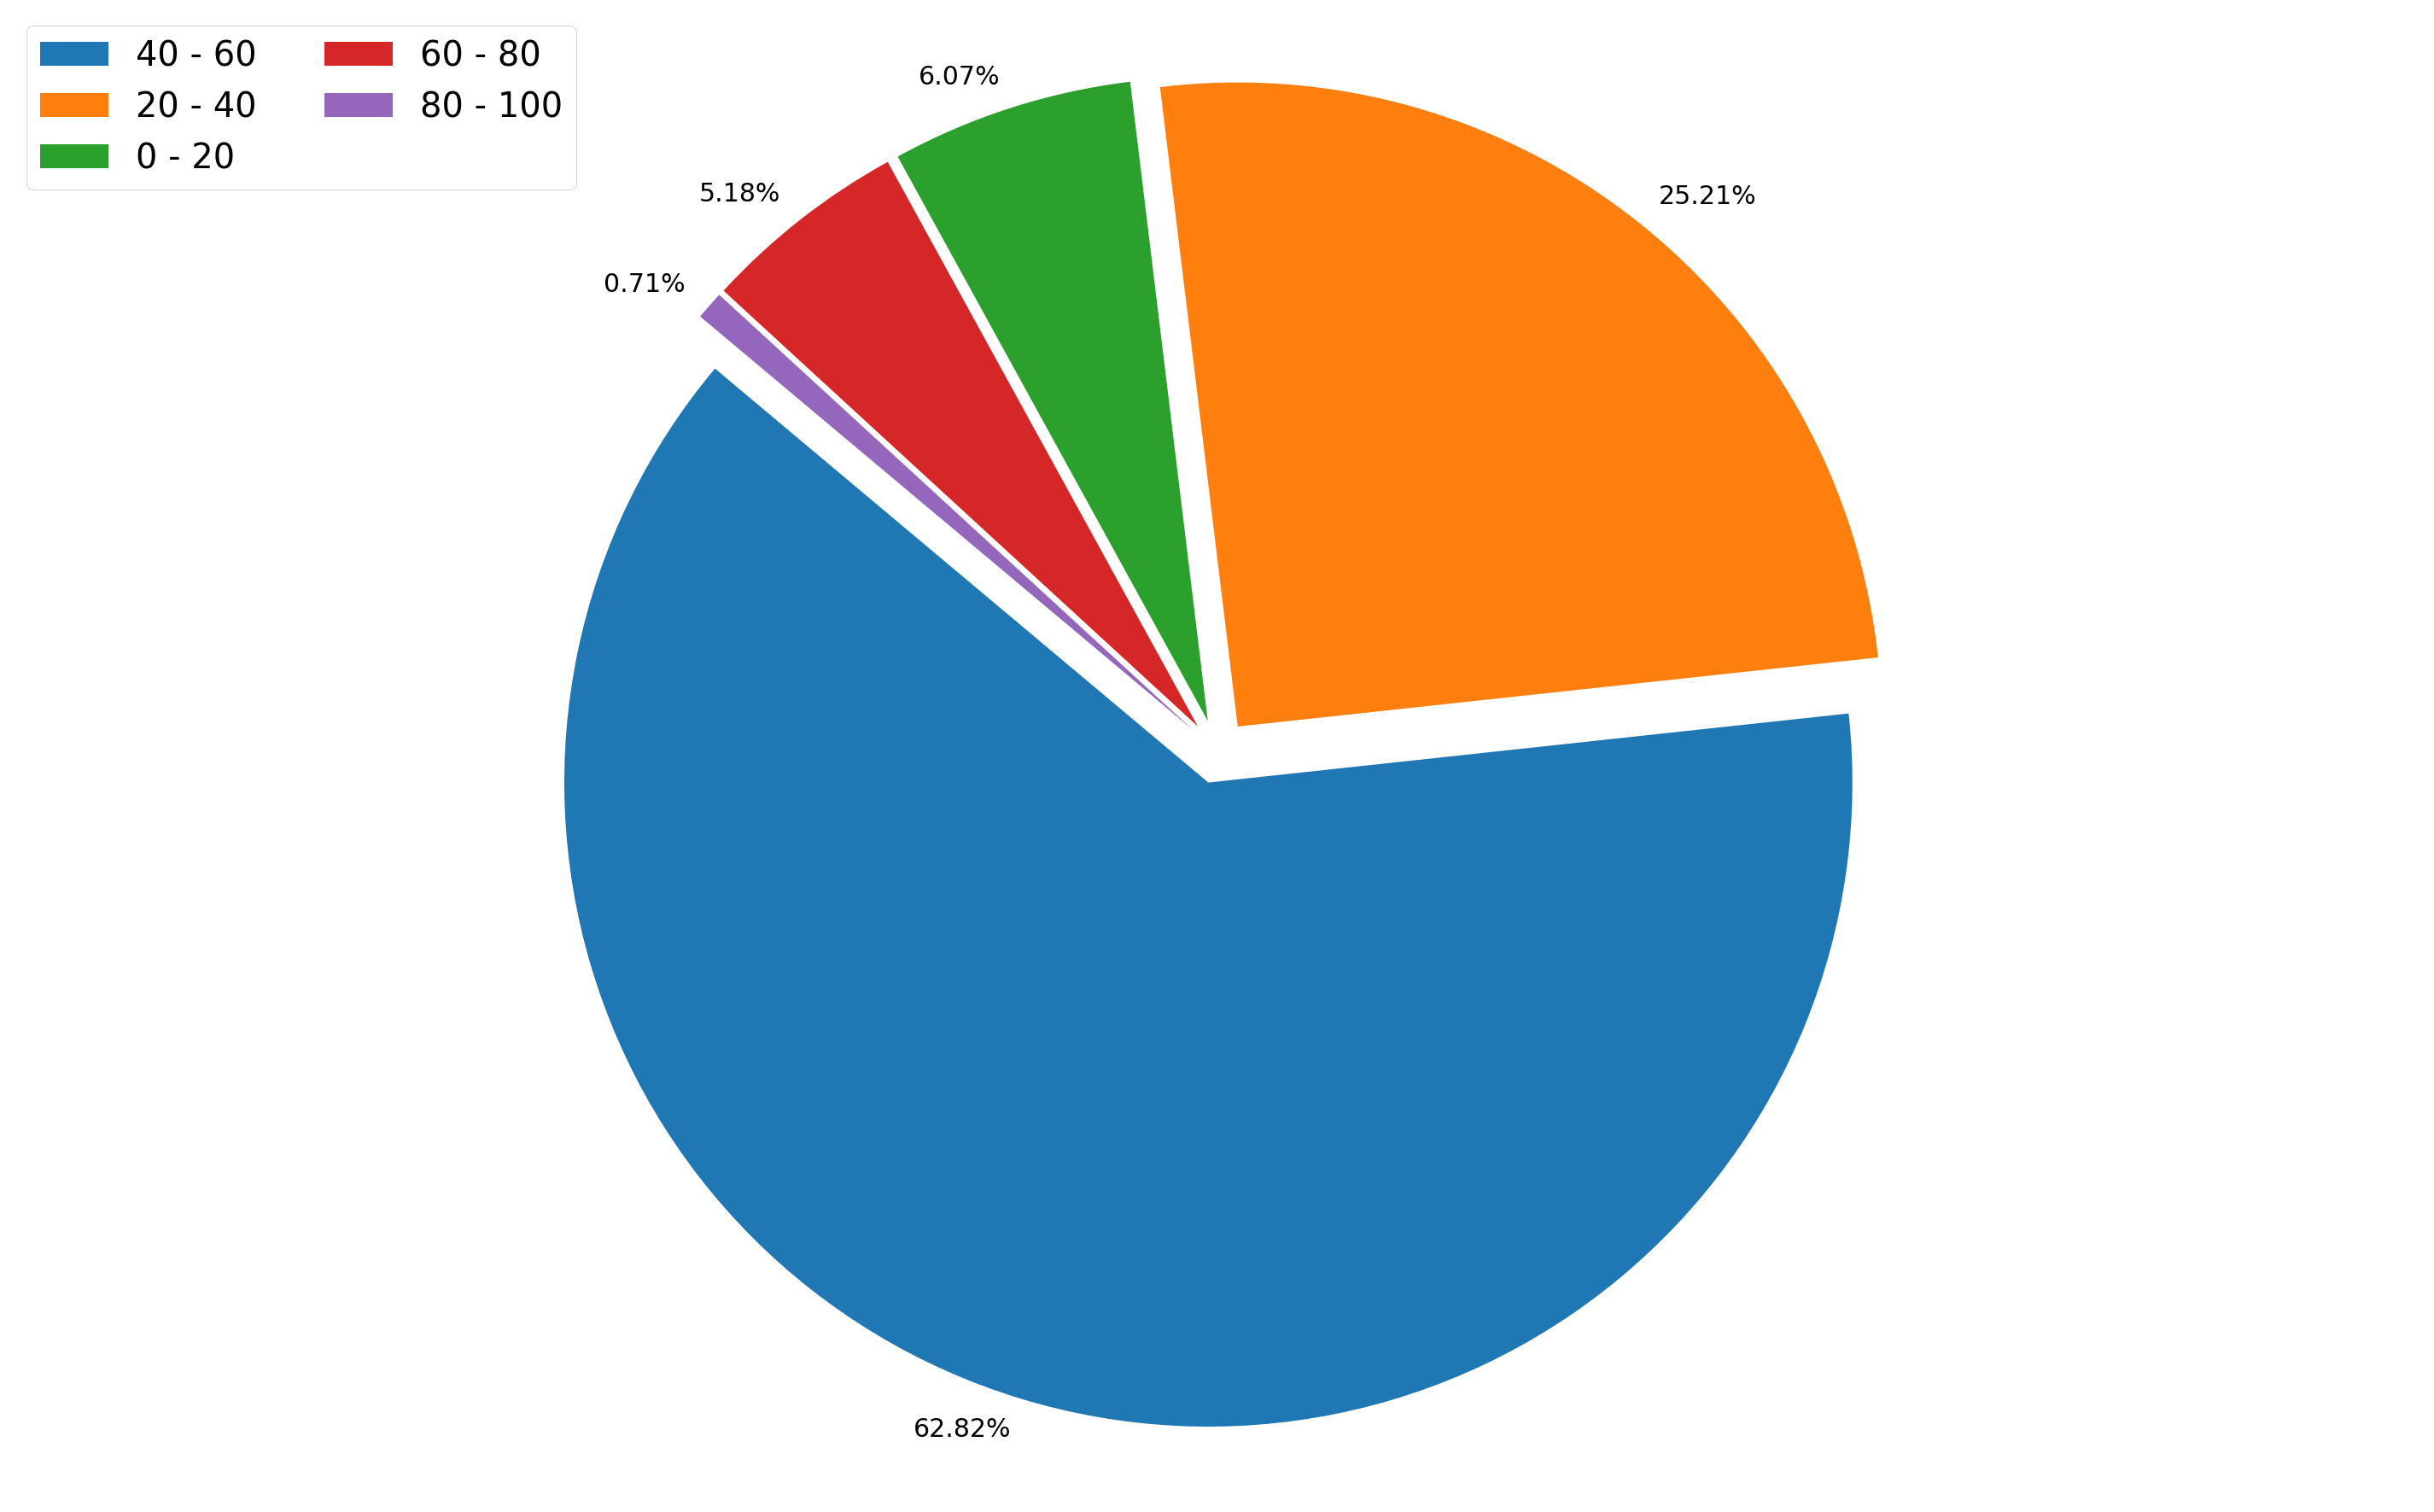

In [99]:
hours_per_week = list(data['hours-per-week'].values)
hours_per_week = rounding_values(hours_per_week, 20)

labels_array = []
for i in hours_per_week.keys():
    label = '{0} - {1}'.format(i, i + 20)
    labels_array.append(label)
    
percentage_labels = []
for x in hours_per_week.values():
    s = "%.2f" % ((x/len(data['hours-per-week'].values))*100)
    percentage_labels.append(s + '%')

labels = labels_array
sizes = hours_per_week.values()
colors = palette
plt.figure(figsize=(40,25))
patches, texts = plt.pie(sizes, explode=[0.1, 0.1, 0.1, 0.1, 0.1], radius=2, 
                         labeldistance=1.05, labels=percentage_labels, colors=colors, startangle=140)
plt.legend(patches, labels, loc=0, fontsize=40, ncol=2)
texts[0].set_fontsize('30')
texts[1].set_fontsize('30')
texts[2].set_fontsize('30')
texts[3].set_fontsize('30')
texts[4].set_fontsize('30')
plt.axis('equal')
plt.tight_layout()

plt.show()

V stĺpci **hours-per-week** máme hodnoty o tom, koľko hodín týždenne skúmaní pacienti odpracujú. Takmer dve tretiny pacientov pracujú týždenne 40-60 hodín, čo je 8-12 hodín denne počas pracovného týždna. Necelých 7% pacientov pracuje 60 až 100 hodín týždenne, čo bude mať pravdepodobne následky na ich celkový zdravotný stav. Niečo cez 30% odpracuje cez týždeň 0-40 hodín. Z mediánu možme vyčítať, že väčšina pacientov pracuje štandartných 40 hodín týždenne.

In [100]:
output = []
for i in data['hours-per-week'].values:
    output.append(pd.to_numeric(i))

print('Pocet hodnot v stlpci:', len(output))  
print('Priemer hodnot v stlpci:', np.mean(output))
print('Median hodnot stlpca:', np.median(output))

Pocet hodnot v stlpci: 2800
Priemer hodnot v stlpci: 38.46178571428572
Median hodnot stlpca: 40.0


### Stĺpec medical_info

In [101]:
data['medical_info'].describe

<bound method NDFrame.describe of 1       {'goitre':'f','TSH measured':'t','pregnant':'f...
2       {'goitre':'f','TSH measured':'t','pregnant':'f...
3       {'goitre':'f','TSH measured':'t','pregnant':'f...
4       {'goitre':'f','TSH measured':'t','pregnant':'f...
5       {'goitre':'f','TSH measured':'t','pregnant':'f...
6       {'goitre':'f','TSH measured':'t','pregnant':'f...
7       {'goitre':'f','TSH measured':'f','pregnant':'f...
8       {'goitre':'f','TSH measured':'t','pregnant':'f...
9       {'goitre':'f','TSH measured':'t','pregnant':'f...
10      {'goitre':'f','TSH measured':'t','pregnant':'f...
11      {'goitre':'f','TSH measured':'t','pregnant':'f...
12      {'goitre':'f','TSH measured':'t','pregnant':'f...
13      {'goitre':'f','TSH measured':'t','pregnant':'f...
14      {'goitre':'f','TSH measured':'t','pregnant':'f...
15      {'goitre':'f','TSH measured':'t','pregnant':'f...
16      {'goitre':'f','TSH measured':'t','pregnant':'f...
17      {'goitre':'f','TSH measured':'

Pri náhľade do obsahu posledného stĺpca **medical_info** vidíme, že tento stĺpec obsahuje JSON. Tieto JSON-y rozdelíme do jednotlivých stĺpcov podľa ich atribútov, a získané hodnoty nám následne pomôžu efektívnejšie analyzovať zdravotný stav jednotlivých pacientov.

In [102]:
import json

lst = []

for a in data['medical_info']:
    a = a.replace("'", '"')
    record = json.loads(a)
    lst.append(record)
    
df = pd.DataFrame(lst)
df

result = pd.concat([data, df], axis=1)
result

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,f,f,f,f,f,f,f
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,t
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,F,f,f,f,f,f
5,4.0,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,f,?,other,negative.|3047,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,F,f,f,f,f,f
6,5.0,60.0,F,f,f,f,f,f,f,1.1,f,NaN,t,90.0,1.07,t,84,f,?,other,negative.|3198,Self-emp-not-inc,175964,Some-college,??,Divorced,Other-service,Not-in-family,White,0,0,40,United-States,1958-02-13,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,f,f,f,f,f,f,f,f,f
7,6.0,32.0,M,f,f,f,f,f,f,NaN,f,NaN,t,134.0,1.29,t,104,f,?,Other,negative.|1438,Private,61777,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,30,United-States,1985-07-26,"{'goitre':'f','TSH measured':'f','pregnant':'f...",t,t,f,f,t,f,f,t,t,f
8,7.0,71.0,F,f,f,f,t,f,f,2.4,t,1.9,t,133.0,1.09,t,123,f,?,other,negative.|3737,Private,195638,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,0,0,40,United-States,1946-06-21,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
9,8.0,27.0,F,f,f,f,f,f,f,0.02,t,5.3,t,272.0,0.97,t,281,f,?,other,negative.|3351,Private,404085,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,40,United-States,1990-06-02 00:00:00,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f


#

In [103]:
data = result
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2801 entries, 0 to 2800
Data columns (total 45 columns):
nan                          2800 non-null float64
age                          2799 non-null object
sex                          2800 non-null object
query on thyroxine           2800 non-null object
on antithyroid medication    2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
tumor                        2800 non-null object
hypopituitary                2800 non-null object
TSH                          2516 non-null object
T3 measured                  2800 non-null object
T3                           2215 non-null object
TT4 measured                 2800 non-null object
TT4                          2616 non-null object
T4U                          2503 non-null object
FTI measured                 2800 non-null object
FTI                          2800 non-null object
TBG measured                 2800 non-null

### Stĺpec TSH measured

In [104]:
data['TSH measured'].value_counts()

t    2516
f     284
Name: TSH measured, dtype: int64

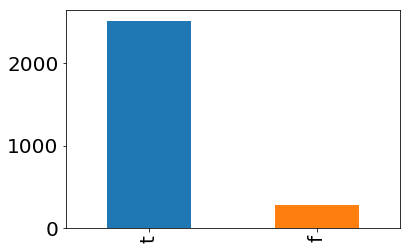

In [105]:
data['TSH measured'].value_counts().plot(kind='bar')

Dokopy máme v stĺpci **TSH measured** 2800 údajov, takže žiadne nechýbajú a nenašli sme v tomto stĺpci žiadne chyby.

### Stlpec goitre

In [106]:
data['goitre'].value_counts()

f    2775
t      25
Name: goitre, dtype: int64

Dokopy máme v stĺpci **goitre** 2800 údajov, takže žiadne nechýbajú a nenašli sme v tomto stĺpci žiadne chyby.

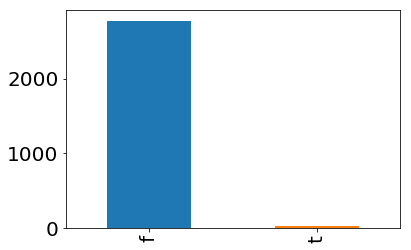

In [107]:
data['goitre'].value_counts().plot(kind='bar')

### Stlpec pregnant

In [108]:
data['pregnant'].value_counts()

f    2759
t      41
Name: pregnant, dtype: int64

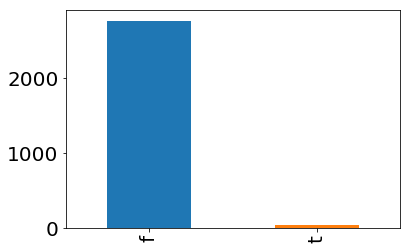

In [109]:
data['pregnant'].value_counts().plot(kind='bar')

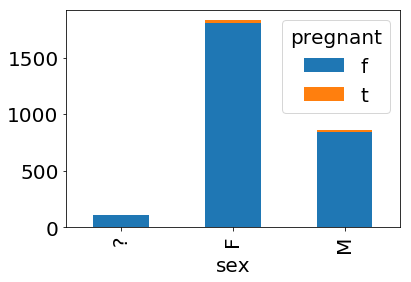

In [110]:
pd.crosstab(index=data['sex'], columns=data['pregnant']).plot.bar(stacked=True)

niektorych muzov vyhodilo ak tehotnych (wtf :D) - takze bud chyba v zapise pohlavia alebo chyba v zapise "pregnant", ale moze sa aj stat, ze ked tak muzov vyhodnotilo, tak su chori

### Stlpec psych

In [111]:
data['psych'].value_counts()

f    2665
t     135
Name: psych, dtype: int64

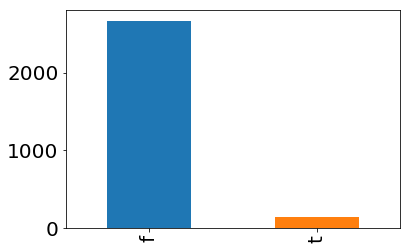

In [112]:
data['psych'].value_counts().plot(kind='bar')

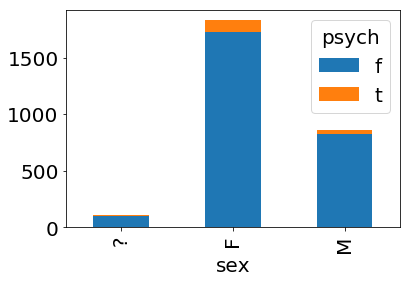

In [113]:
pd.crosstab(index=data['sex'], columns=data['psych']).plot.bar(stacked=True)

### Stlpec query hyperthyroid

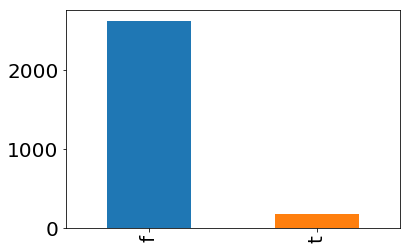

In [114]:
data['query hyperthyroid'].value_counts().plot(kind='bar')

### Stlpec query hypothyroid

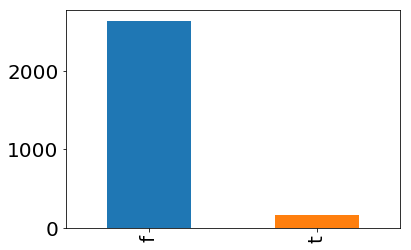

In [115]:
data['query hypothyroid'].value_counts().plot(kind='bar')

### Stlpec sick

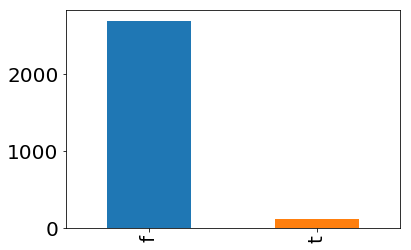

In [116]:
data['sick'].value_counts().plot(kind='bar')

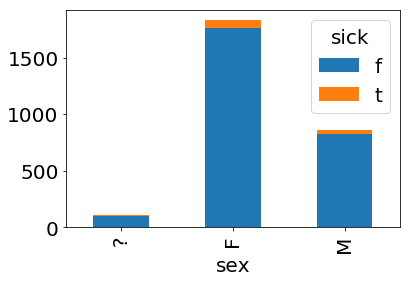

In [117]:
pd.crosstab(index=data['sex'], columns=data['sick']).plot.bar(stacked=True)

In [118]:
#pd.crosstab(index=data['class'], columns=data['sick']).plot.bar(stacked=True)

# Predspracovanie datasetu č.17

In [119]:
#stlpec age - opravit chyby, nahradit hodnoty

### Stĺpec sex

In [120]:
data['sex'].value_counts()

F    1830
M     860
?     110
Name: sex, dtype: int64

In [121]:
i = 0
for sex in data['sex']:
    if(sex == '?'):
        if(data['relationship'][i]=='Wife' or data['pregnant'][i]=='t'):
            data['sex'][i] = 'F'
        elif(data['relationship'][i]=='Husband'):
            data['sex'][i] = 'M'
    i += 1
    
data['sex'].value_counts()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


F    1831
M     860
?     109
Name: sex, dtype: int64

Pokúsili sme sa doplniť chýbajúce hodnoty pohlavia na základe údajov, či je daná osoba Manžel alebo Manželka, keďže nám to indikuje pohlavie alebo ženy ešte na základe toho, či je daná osoba tehotná. Bohužiaľ, týmto spôsobom sme doplnili iba jedno pohlavie zo 110 chýbajúcich trénovacích dát.

In [122]:
#bude tu potrebne doplnit iny sposob doplnenia chybajucich dat

### Stlpec query on thyroxine

In [123]:
data['query on thyroxine'].value_counts()

f    2760
t      40
Name: query on thyroxine, dtype: int64

In [124]:
#netreba nic opravit

### Stlpec on antithyroid medication

In [125]:
data['on antithyroid medication'].value_counts()

f    2766
t      34
Name: on antithyroid medication, dtype: int64

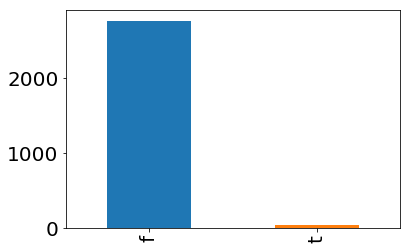

In [126]:
data['on antithyroid medication'].value_counts().plot(kind='bar')

### Stlpec thyroid surgery

In [127]:
data['thyroid surgery'].value_counts()

f    2761
t      39
Name: thyroid surgery, dtype: int64

In [128]:
#nic nechyba

### Stlpec I131 treatment

In [129]:
data['I131 treatment'].value_counts()

f    2752
t      48
Name: I131 treatment, dtype: int64

In [130]:
#nic nechyba

### Stlpec tumor 

In [131]:
data['tumor'].value_counts()

f    2729
t      71
Name: tumor, dtype: int64

In [132]:
#nic tu nechyba

### Stlpec hypopituitary 

In [133]:
data['hypopituitary'].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [134]:
# skoro vsetko false - vyhodit asi

### Stlpec TSH

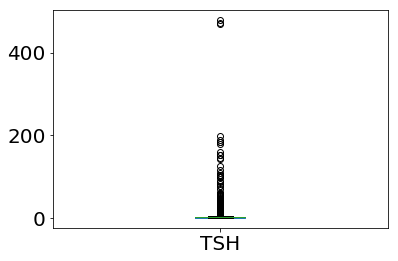

In [135]:
data["TSH"] = np.array(data["TSH"]).astype(np.float)
data["TSH"].plot(kind="box")

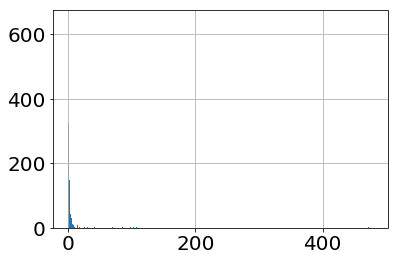

In [136]:
data['TSH'].hist(bins=1000)

In [137]:
#vela blbych hodnot, dole optimalizacia

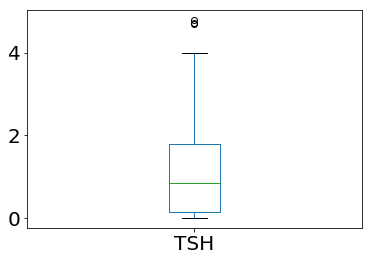

In [138]:
data["TSH"] = np.array(data["TSH"]).astype(np.float)

listTSH = []

for i in data['TSH']:
    if(i > 4.0):
        i /= 100.0
        listTSH.append(i)
    else:
        listTSH.append(i)
    
data['TSH'] = listTSH
data['TSH'].plot(kind="box")

In [139]:
#uz to vyzera celkom ok

### Stlpec T3 measured

In [140]:
data['T3 measured'].value_counts()

t    2215
f     585
Name: T3 measured, dtype: int64

In [141]:
#mame vsetky

### Stlpec T3

In [142]:
data['T3'].describe()

count     2215
unique      64
top        2.0
freq       169
Name: T3, dtype: object

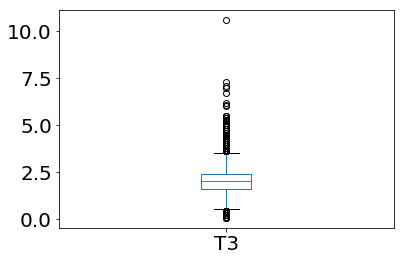

In [143]:
data["T3"] = np.array(data["T3"]).astype(np.float)
data["T3"].plot(kind="box")

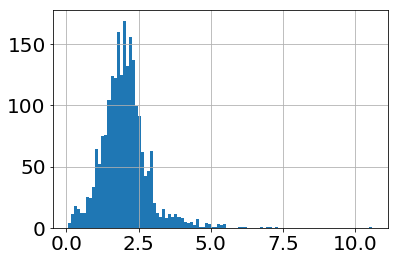

In [144]:
data['T3'].hist(bins=100)

vidim ze to ma vychylene hodnoty - ale tie mozu indikovat chorobu?

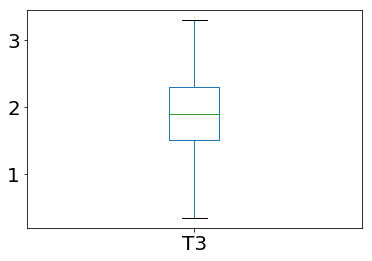

In [145]:
listT3 = []

for i in data['T3']:
    if(i > 3.3):
        i /= 10.0
        listT3.append(i)
    elif(i < 0.5):
        i += 1 
        listT3.append(i)
    else:
        listT3.append(i)
    
data['T3'] = listT3
data['T3'].plot(kind="box")

In [146]:
# uz to vyzera celkom ok

### Stlpec TT4 measured

In [147]:
data['TT4 measured'].value_counts()

t    2616
f     184
Name: TT4 measured, dtype: int64

In [148]:
#mam vsetko

### Stlpec TT4

In [149]:
data['TT4'].describe()

count      2616
unique      217
top       101.0
freq         62
Name: TT4, dtype: object

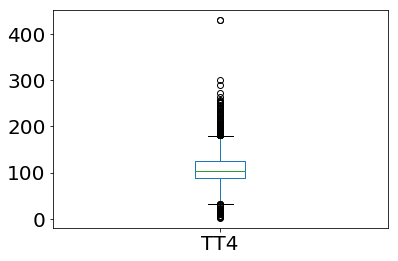

In [150]:
data['TT4'] = np.array(data['TT4']).astype(np.float)
data['TT4'].plot(kind='box')

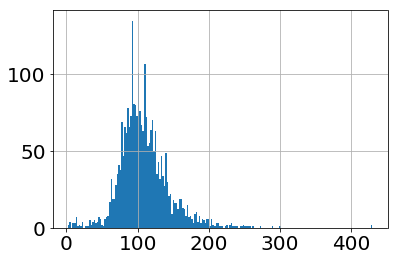

In [151]:
data['TT4'].hist(bins=200)

In [152]:
listTT4 = []
TT4 = data['TT4']

for i in data['TT4']:
    if(i > 150.0):
        i -= 100.0
        listTT4.append(i)
    elif(i < 50):
        #i *= 10
        i += 100
        listTT4.append(i)
    else:
        listTT4.append(i)
    
TT4 = listTT4
TT4.plot(kind="box")

AttributeError: 'list' object has no attribute 'plot'

In [ ]:
#uz to vyzera ok?

### Stlpec T4U measured

In [153]:
data['T4U measured'].value_counts()

t    2503
f     297
Name: T4U measured, dtype: int64

### Stlpec T4U

In [154]:
data['T4U'].describe()

count     2503
unique     138
top       0.99
freq        81
Name: T4U, dtype: object

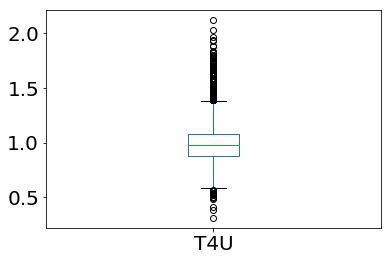

In [155]:
data['T4U'] = np.array(data['T4U']).astype(np.float)
data['T4U'].plot(kind='box')

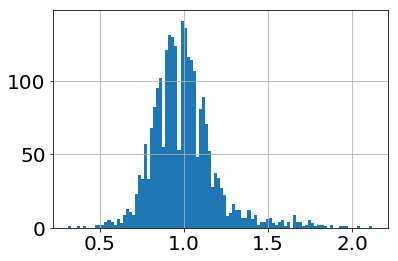

In [156]:
data['T4U'].hist(bins=100)

In [ ]:
# treba opravit vychylene hodnoty

In [ ]:
listT4U = []

for i in data['T4U']:
    if(i > 10):
        i /= 2
        listT4U.append(i)
    elif(i < 0.0):
        #i *= 10
        i *= 2
        listT4U.append(i)
    else:
        listT4U.append(i)
    
data['T4U'] = listT4U
data['T4U'].plot(kind='box')

In [ ]:
#vyzera to uz ok

In [ ]:
iterator = 0
for age in data['age']:
    if (check_if_number(age)):
        age = int(float(age))
        age = abs(age)
        if age >= 1000:
            age = age/100
        
        elif age >= 100:
            age = age/10

        age = int(age)
    
    else:
        age = 0
    
    data.age[iterator] = age
    iterator += 1


In [ ]:
result = pd.concat([data['education-num'], data.education], axis=1)
result = list(result[['education-num', 'education']].itertuples(index=False, name=None))

educations = []
iterator = 0
for x in result:
    if x not in educations and check_if_number(x[0]):
        educations.append(x)
        iterator +=1

iterator = 0
for education in data['education-num']:
    if not(check_if_number(education)):
        for a in educations:
            if data.education[iterator] == a[1]:
                data['education-num'][iterator] = a[0]
                
    iterator += 1

In [ ]:
lst_sick = []
lst = []

temp = data.as_matrix()

for row in temp:
    if 'sick' in str(row[20]):
        lst_sick.append(row)
    else:
        lst.append(row)

# ti co su chori
df_sick = pd.DataFrame(lst_sick, columns=data.keys())
df = pd.DataFrame(lst, columns=data.keys())


In [ ]:
data = data.iloc[1:]
data = data.drop(data.columns[[0]], axis=1)
del data['TBG']
del data['medical_info']
data[['class','class_id']] = data['class'].str.split('|',expand=True)

In [ ]:
for i, value in data['on thyroxine'].iteritems():
    value = str(value).lower()
    if 't' in value:
        data['on thyroxine'][i] = 't'
    elif 'f' in value:
        data['on thyroxine'][i] = 'f'

for i, value in data['class'].iteritems():
    data['class'][i] = str(value).replace('.', '')